<a href="https://colab.research.google.com/github/KartikKumar7070/Online-Retail-Customer-Segmentation/blob/main/ML_Unsupervised_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -Online Retail Customer Segmentation**



##### **Project Type    - Unsupervised**
##### **Contribution    - Individual**
##### **Performed by    - Kartik Kumar**


# **Project Summary -**

#### In this project, our task was to identify major customer segments on a transnational data set that contained one-year historical transactions for a UK-based online retail store. This would help the company segregate its customers based on transaction data and help them in marketing decisions and strategy.
#### Effective decisions are  mandatory   for any   company   to   generate   good revenue. In these days competition is huge   and   all  companies   are   moving forward   with   their   own   different strategies.   We   should   use   data   and take a proper decision. Every person is different   from   one   another   and   we don’t know what he/she buys or what their  likes  are.   But,  with the   help  of machine   learning  technique   one  can sort out the data and can find the target group by applying   several   algorithms to the dataset. Without this, It will be very difficult and no better techniques are   available   to   find   the   group   of people   with   similar   character   and interests in a large dataset.Customer segmentation can help businesses focus on each customer group in a different way, in order to maximise benefits for customers as well as the business.
#### After basic exploration and cleaning the data we found relationships between features in EDA and then jumped into the RFM analysis part.I implemented various unsupervised machine learning algorithm such as KMeans Clustering,  Hierarchical Clustering(Agglomerative Clustering). Here to find the Optimal number of clusters we used Elbow method and Silhouette Score and Silhouette Plot to visualize the clusters with different number of clusters. For Agglomerative Clustering we used Dendogram to find the optimal number of clusters.
#### First imported the libraries and dataset which was in excel file and This dataset contains 541909 rows and 8 columns, then checked for duplication of data and null values.
#### There were more than 120000 null values present in CustomerID Column it main column as other column was filled with zero and drop all values.
#### Various plots are visualized to see Outliers and Applied Inter Quartile Range method.
#### RFM analysis can segment customers into homogenous group quickly with set of minimum variables. Scoring system can be defined and ranged differently. We get a better result for clustering steps by applying scoring rather than using the raw calculated RFM values. Therefore, segmenting should be done by RFM scoring and further analysis on the spending behavior should be done on the raw values for the targeted cluster to expose more insight and characteristics. RFM analysis solely depends on purchasing behavior and histories, analysis can be further improved by exploring weighted composite scoring or including customer demographic information and product information. A good analysis can increase effectiveness and efficiency of marketing plans, hence increase profitability at minimum cost.
#### Data was used different units so its scaled using Standard Scaler and normalise data.To find Number Clusters we applied Elbow Method and silhouette score the Selected Cluster Size with Visualized Graph.K-Means Clustering was applied,Dendrogram Linkage and Hierarchical Agglomerative Clustering Models are applied.
#### We started with a simple binning and quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.
#### Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering





# **GitHub Link -**
https://github.com/KartikKumar7070/Online-Retail-Customer-Segmentation.git

# **Problem Statement**
#### Customer Segmentation is a most popular and common technique to used by the most of the e-commerce retail companies. In order to increase top line and bottom line of the company, they need to inspect some things where customer segmentation helps a lot. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

#### Main objectives are we want to know our customer , what they like to purchace , how frequent they purchase, when purchase , in which season they purchase the most , which products are sold in large scale .
#### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import scipy
import scipy.stats as stat
import math
import sklearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [4]:
# Loading Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#loading the datasets
df = pd.read_excel('/content/drive/MyDrive/ML UML CAPSTONE PROJECT/Online Retail.xlsx')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [7]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

#### There are 541909 Rows and 8 Columns

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
len(df.duplicated())


541909

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

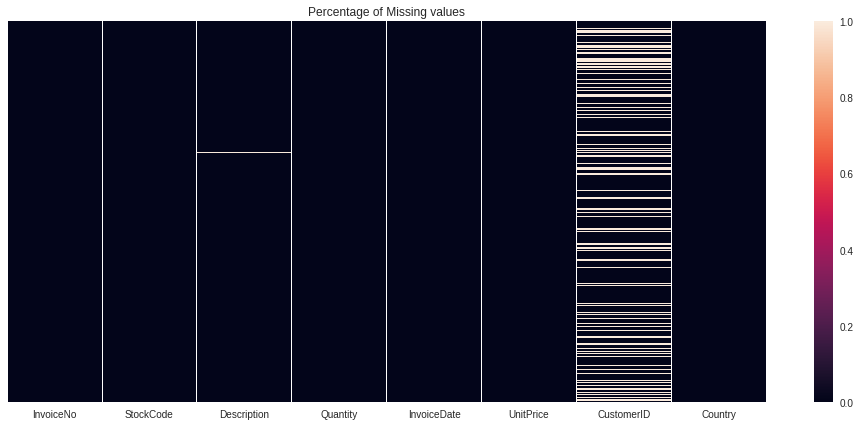

In [12]:
# Visualizing the missing values
plt.figure(figsize=(17, 7))
sns.heatmap(df.isnull(),cbar=True, yticklabels=False)
plt.title("Percentage of Missing values")
plt.show()

In [13]:
df.shape

(541909, 8)

### What did you know about your dataset?
#### This dataset contains 541909 rows and 8 columns.There are null values present in our dataset for CustomerID and Description columns.This dataset has different datatype columns ie Object, Integer, Float, Datetime.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description 
#### **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

#### **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

#### **Description:** Product (item) name. Nominal.

#### **Quantity**: The quantities of each product (item) per transaction. Numeric.

#### **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.

#### **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

#### **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

####**Country:** Country name. Nominal, the name of the country where each customer resides 

### Check Unique Values for each variable.

In [16]:
# Checking for Unique Values for each variable.
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Since null values are present in the CustomerID and we know that every customerid is unique to different customers so we cannot input values from our own as it will add noise to our dataset so we will drop the null values for customerid column directly.
#### Description column has also some null values but for this column aswell we dont know what product the null values represent to so we will dropping the null values from this columns aswell.

In [18]:
#Missing value count Function
def show_missing():
  missing = df.columns[df.isnull().any()].tolist()
  return missing

#Missing data count and percentage
print("Missing Data Count")
print(df[show_missing()].isnull().sum().sort_values(ascending=False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [19]:
#Handling the missing values
#Customer id is irrelavant so dropping
#df.drop.('CustomerID', axis=1, inplace=True)

#Description cant be imputed by mesuare of tendancy
#So dropping null value row
df.dropna(inplace=True)

df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [20]:
#confirmation on null value
df.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [22]:
#Converting invoice number columns into str
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

#Remove row which are cancelled
df = df[~df['InvoiceNo'].str.contains('C')]

In [23]:
df.shape

(397924, 8)

#### Now after removing null values our dataset has 397924 Rows and 8 Columns.

In [24]:
len(df.duplicated())

397924

In [25]:
df.describe()

Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

In [26]:
df.Quantity.describe([0.75,0.90,0.95,0.99])

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
50%           6.000000
75%          12.000000
90%          24.000000
95%          36.000000
99%         120.000000
max       80995.000000
Name: Quantity, dtype: float64

In [27]:
df.UnitPrice.describe([0.75,0.90,0.95,0.99])

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
50%           1.950000
75%           3.750000
90%           6.350000
95%           8.500000
99%          14.950000
max        8142.750000
Name: UnitPrice, dtype: float64

### What all manipulations have you done and insights you found?
#### Since null values are present in the CustomerID and we know that every customerid is unique to different customers so we cannot input values from our own as it will add noise to our dataset so we will drop the null values for customerid column directly.
#### Description column has also some null values but for this column aswell we dont know what product the null values represent to so we will dropping the null values from this columns aswell.
#### I have encountered some duplicated observations in the dataset, when we have frequent duplicates in our database, we may inadvertently send multiple clustering messages to the same person CustomerID. As a Consequence, we dropped it.
#### Here i have also removed all the invoice no. that contains C as the C in the invoice no. stands for cancellation of product we can do another analysis who cancelled but that is not the target of our project.

## ***4.Exploratory Data Analysis,Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Quantity wise Top Products

In [28]:
df_quant = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index()[:5]
df_quant

Description  Quantity
0         PAPER CRAFT , LITTLE BIRDIE     80995
1      MEDIUM CERAMIC TOP STORAGE JAR     77916
2   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
3             JUMBO BAG RED RETROSPOT     46181
4  WHITE HANGING HEART T-LIGHT HOLDER     36725

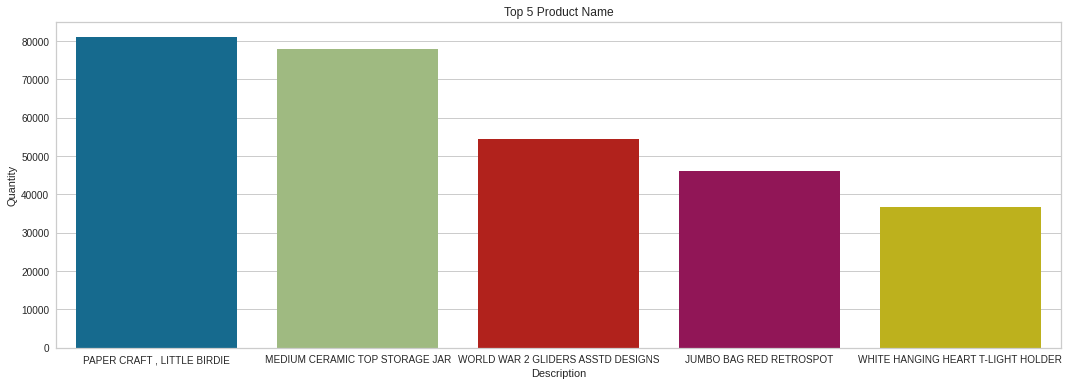

In [29]:
plt.figure(figsize=(18,6))
plt.title('Top 5 Product Name')
sns.barplot(x='Description',y='Quantity',data=df_quant[:5])

#### 1. Why did you pick the specific chart?
#### A barplot (or barchart) is one of the most common types of graph. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar.

#### 2. What is/are the insight(s) found from the chart?
#### Here we can see the top 5 products with respect to the quantity they are bought.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
#### Yes the gained insight help us create a positive business impact.

### Popularity Wise Top Products

In [30]:
#Creating DataFrame on description and count
Description_df = df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index':'Description_Name'},inplace=True)
Description_df.rename(columns={'Description':'Count'}, inplace=True)
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1724
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1397

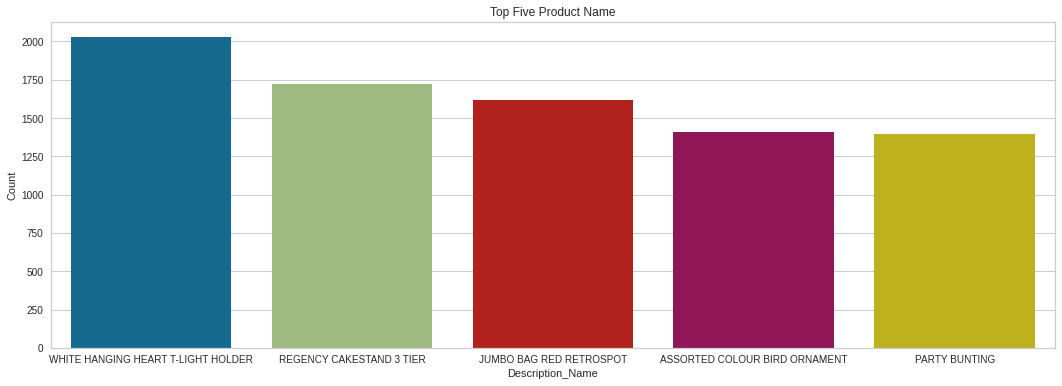

In [31]:
#Plotting on barplot
plt.figure(figsize=(18,6))
plt.title('Top Five Product Name')
sns.barplot(x='Description_Name',y='Count', data=Description_df[:5])

#### 1. What is/are the insight(s) found from the chart?
#### Here we can see the top 5 products with respect to there popularity.

#### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
#### Yes the gained insight will help us create a positive business impact.

### Popularity Wise Bottom Products

In [32]:
Description_df.tail()

Description_Name  Count
3872      RUBY GLASS CLUSTER EARRINGS      1
3873   PINK CHRYSANTHEMUMS ART FLOWER      1
3874  72 CAKE CASES VINTAGE CHRISTMAS      1
3875     WALL ART , THE MAGIC FOREST       1
3876      PAPER CRAFT , LITTLE BIRDIE      1

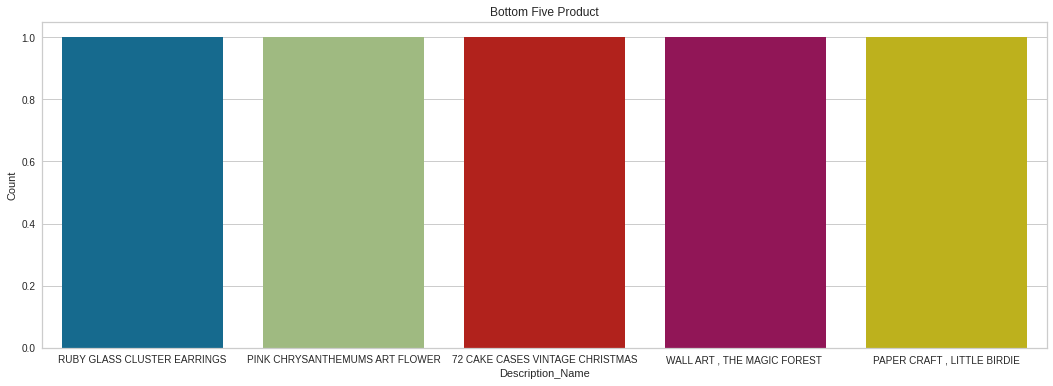

In [33]:
#Plotting bottom five Product Based On Selling
plt.figure(figsize=(18,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])


#### 1. What is/are the insight(s) found from the chart?
#### Here we can see the bottom 5 products with respect to there popularity.

#### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
#### Yes the gained insight will help us create a positive business impact as we will not sell these products.

## Stockcode

### Top 5 Stockname

In [34]:
#Creating the table of stock distribution
Stockcode_df = df['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name'},inplace=True)
Stockcode_df.rename(columns={'StockCode':'Count'},inplace=True)
Stockcode_df.head(10)

StockCode_Name  Count
0         85123A   2035
1          22423   1724
2         85099B   1618
3          84879   1408
4          47566   1397
5          20725   1317
6          22720   1159
7          20727   1105
8           POST   1099
9          23203   1098

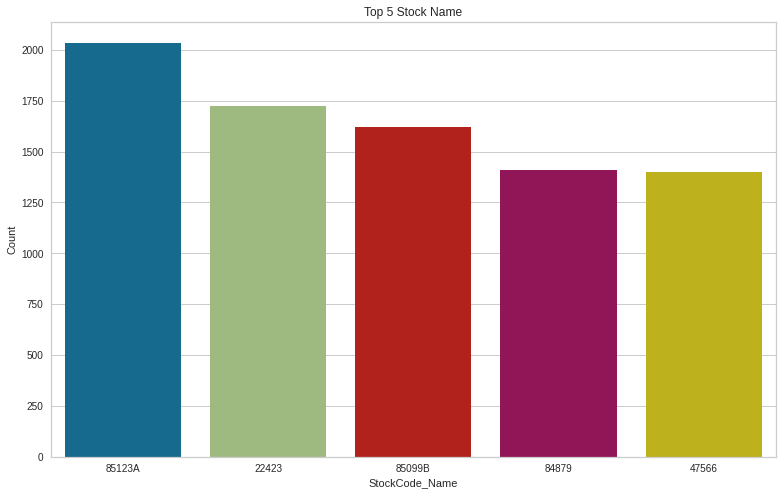

In [35]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[:5])

## Bottom 5 stock name

In [36]:
Stockcode_df.tail()

StockCode_Name  Count
3660          90168      1
3661          90169      1
3662         90202A      1
3663          90118      1
3664          23843      1

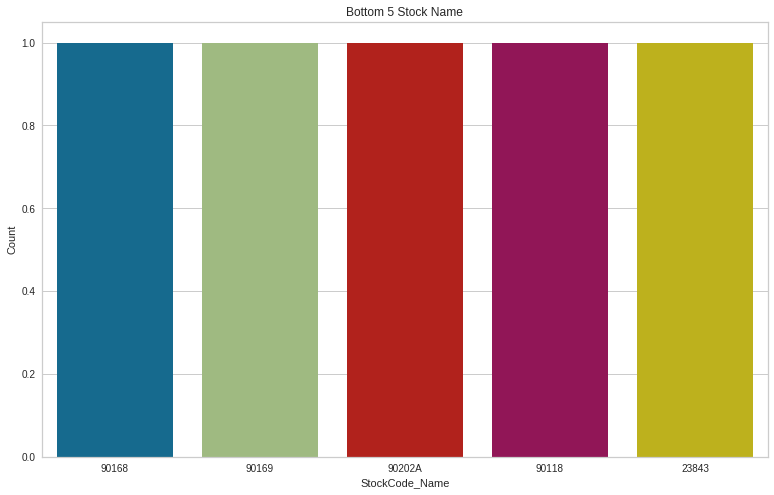

In [37]:
plt.figure(figsize=(13,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[-5:])

#### 1. Why did you pick the specific chart?
#### Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages

#### 2. What is/are the insight(s) found from the chart?
#### Here we plotted on the basis of stock code , then we get stokecode 85123A is the first highest selling product and 22423 is the second highest selling product.These stock name resembles the description only ie 85123A resembles the description WHITE HANGING HEART T-LIGHT HOLDER and same for all stock names.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
#### This chart and table helps us to understand what the customers like and dislikes . while looking into the least stockcode graph ,the values are almost equal,which resembles the same story as that for description.



## Invoice Date

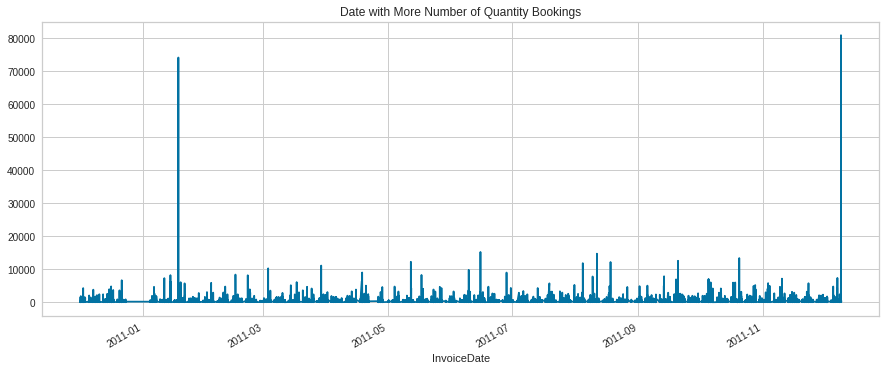

In [151]:
df.groupby('InvoiceDate')['Quantity'].sum().plot.line(figsize=(15,6))
plt.title('Date with More Number of Quantity Bookings')
plt.show()

#### 1. Why did you pick the specific chart?
#### That is a simple line graph that uses lines to connect individual data points.

#### 2. What is/are the insight(s) found from the chart?
#### Date with More Number of Quantity Bookings. the highest number of quantities booking is 8000 which is on 2/18/2011 second highest booking is 7500(approx) on 1/10/11

#### This line graph shows the quantity of items booked for each invoice date. You can see that there is a clear trend of increasing quantities from November to December.



#### 3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### We can see that there is a clear trend of increasing quantities from November to December.

## Country Description

In [39]:
#Creating the table of Country countribution with its distribution
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country_Name'},inplace=True)
country_df.rename(columns={'Country':'Count'},inplace=True)
country_df.head()

Country_Name   Count
0  United Kingdom  354345
1         Germany    9042
2          France    8342
3            EIRE    7238
4           Spain    2485

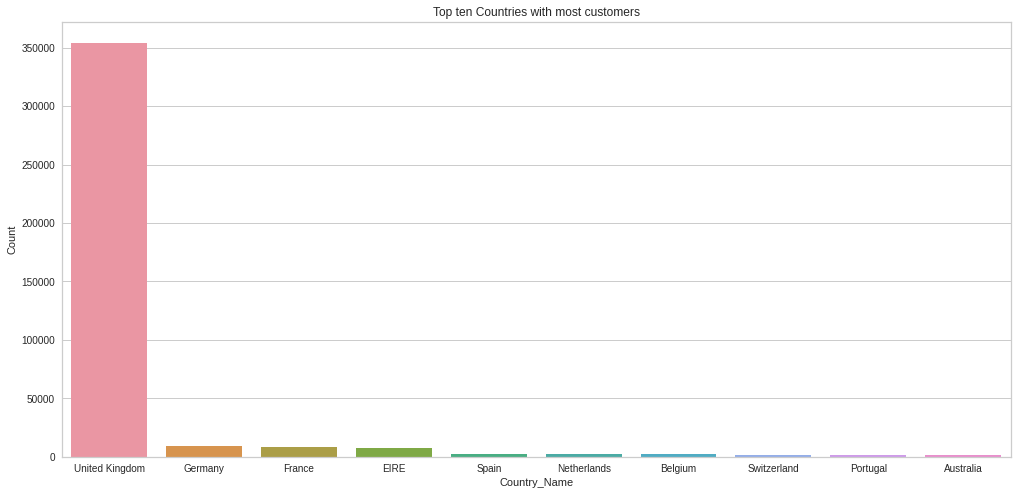

In [40]:
#Ploting top five countries
plt.figure(figsize=(17,8))
plt.title('Top ten Countries with most customers')
sns.barplot(x='Country_Name', y='Count',data=country_df[:10] )

In [41]:
country_df.tail()

Country_Name  Count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9

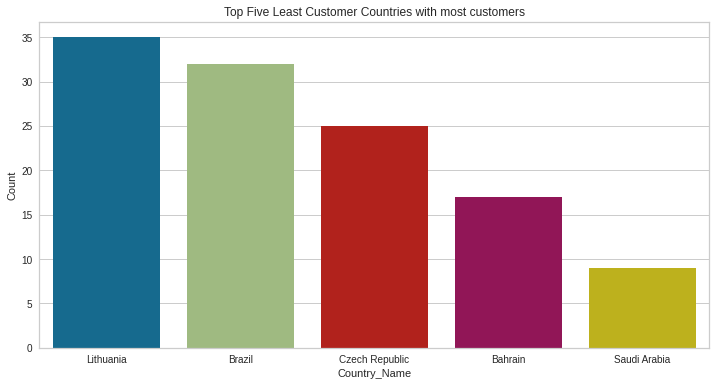

In [42]:
#Plotting top least customer countries
plt.figure(figsize=(12,6))
plt.title('Top Five Least Customer Countries with most customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

#### 1. Why did you pick the specific chart?
#### Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages, to show the number of purchase done in each country i used bar plot 

#### 2. What is/are the insight(s) found from the chart?
#### UK has the most number of count and is quite usual as the online retail is UK based,and also the top count of orders are from nearby european countries only which is also practical.Similarly the bottom countries having least count are the one which are far for UK.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
#### Yes this anlaysis will us segment our customers based on the countries and priortise them accordingly.

## Distribution Plot

### Quantity

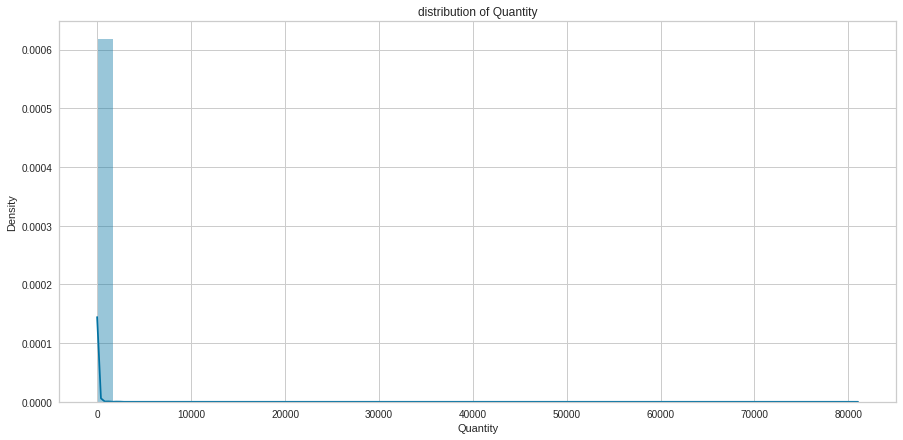

In [43]:
#distribution of Quantity
plt.figure(figsize=(15,7))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

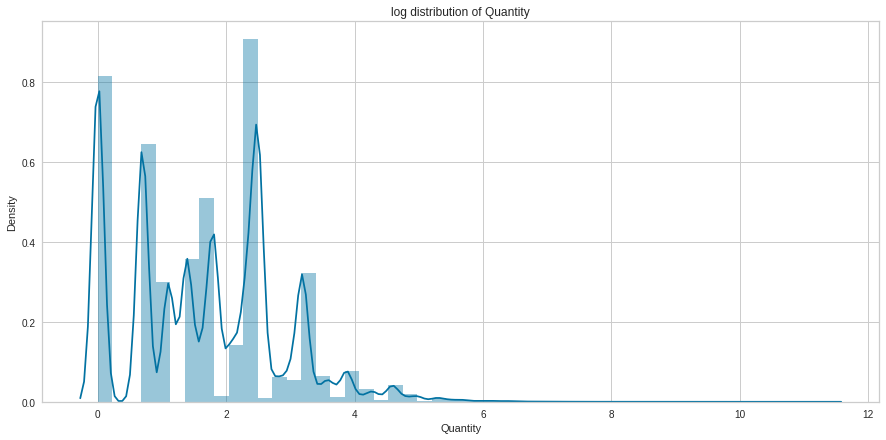

In [44]:
plt.figure(figsize=(15,7))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

## Unit Price

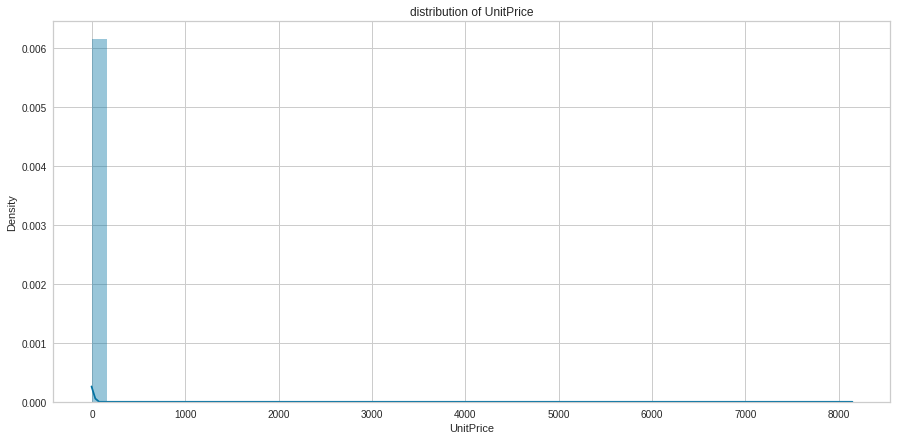

In [45]:
plt.figure(figsize=(15,7))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

In [46]:
df[df['UnitPrice']<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [47]:
df=df[df['UnitPrice']>0]
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

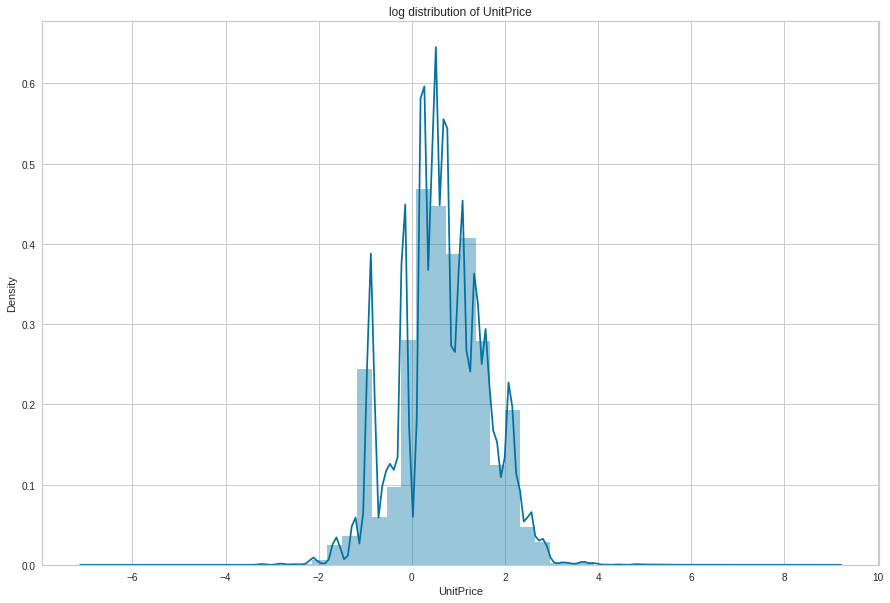

In [48]:
plt.figure(figsize=(15,10))
plt.title('log distribution of UnitPrice')
sns.distplot(np.log(df['UnitPrice']),color="B")

##### 1. Why did you pick the specific chart?
#### It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset. 

#### 2. What is/are the insight(s) found from the chart?
#### From both the quantity and unit price distribution plot i can see is that quantity of majority of product is not very high and the unit price is also not very high for the entire dataset,which means that the customers are buying product in less quantity and the prices of product is also not very high.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
#### Yes the gained Insight will help us positive business growth as we can set our target accordingly.

### **EXTRACTING FEATURES FROM DATETIME**

In [49]:
from datetime import datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Hour']=df['InvoiceDate'].dt.hour

## Hourly Sales

In [50]:
hour_df=df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  72065
1          13  64026
2          14  54118
3          11  49084
4          15  45369
5          10  37997
6          16  24089
7           9  21944
8          17  13071
9           8   8690
10         19   3321
11         18   2928
12         20    802
13          7    379
14          6      1

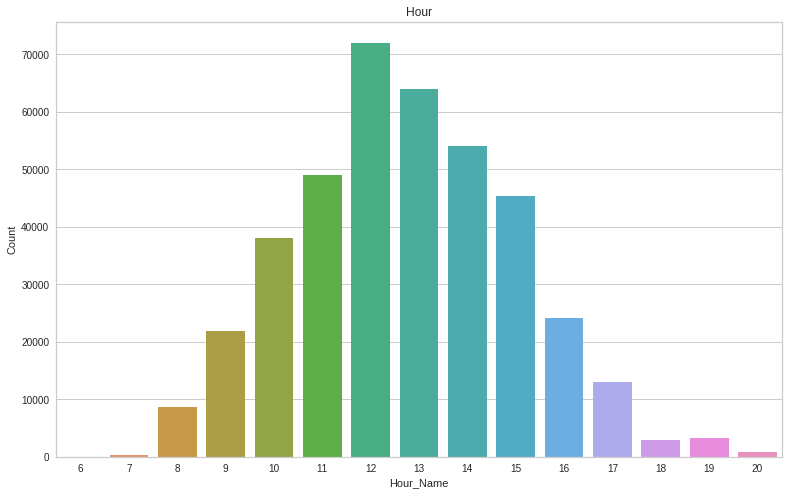

In [51]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

In [52]:
# this function segments the time from 6-11 as morning
# 12-17 as afternoon and other wise evening
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [53]:
df['Time_type']=df['Hour'].apply(time_type)

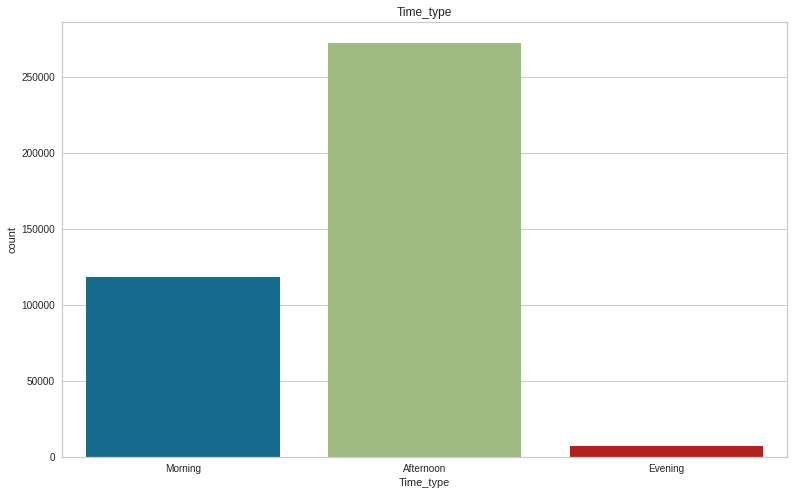

In [54]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

#### 1. Why did you pick the specific chart?
#### A countplot basically counts the categories and returns a count of their occurrences,so here we had different count for different hours so we used count plot.

#### 2. What is/are the insight(s) found from the chart?
#### From the Hour_Name vs Count graph we can see that in AfterNone Time most of the customers have purches the item and from the Time_type vs Count graph we can see that Most of the customers have purches the items in Aftrnoon,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening.


#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
#### Yes the gained insight will help our business in giving the good deals at the time our customer is online on our website or app.

## Day Sales

In [55]:
df['Day']=df['InvoiceDate'].dt.day_name()

In [56]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  80035
1  Wednesday  68885
2    Tuesday  66473
3     Monday  64893
4     Sunday  62773
5     Friday  54825

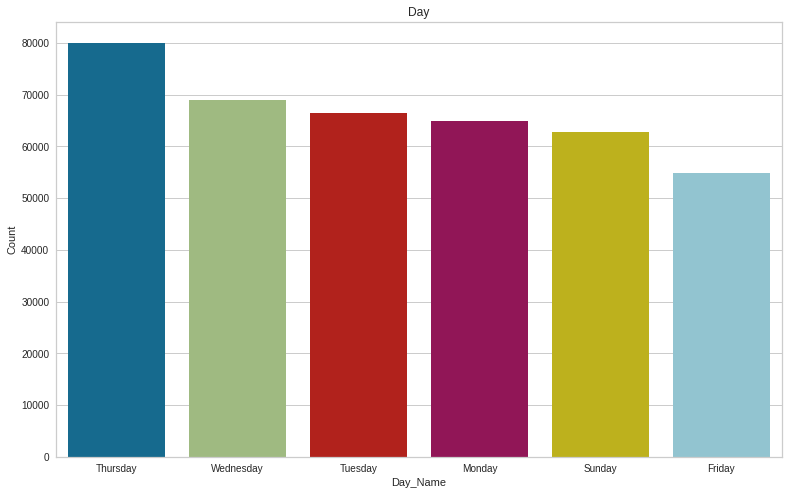

In [57]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

#### 1. What is/are the insight(s) found from the chart?
#### The maximum number of sales happens to be on Thursday and then Wednesday and Tuesday.


#### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
#### Yes the gained insights help us creating a positive business impact.

## Monthly Sales

In [58]:
df['Month']=df['InvoiceDate'].dt.month_name()

In [59]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0    November  64531
1     October  49554
2    December  43461
3   September  40028
4         May  28320
5        June  27185
6       March  27175
7      August  27007
8        July  26825
9       April  22642
10    January  21229
11   February  19927

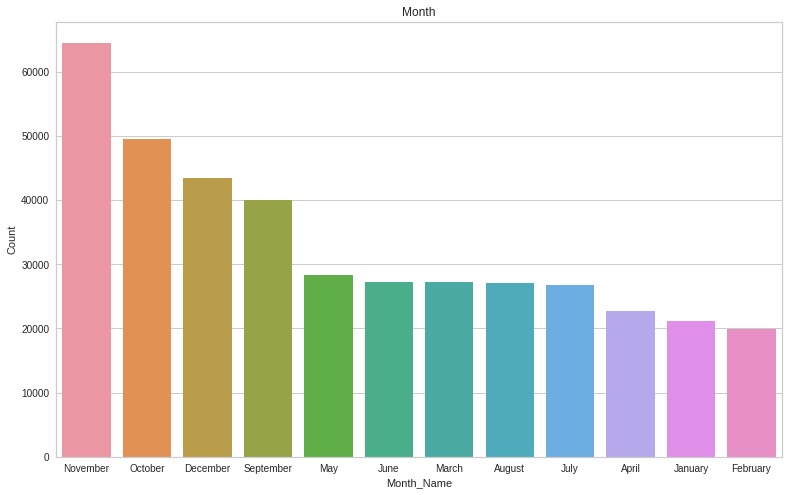

In [60]:

plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

#### 2. What is/are the insight(s) found from the chart?
#### From the chart we can see that the maximum number of sales happens in month of November, October, December and September.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
#### Yes the gained insights help creating a positive business impact.

In [61]:
from datetime import datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Hour']=df['InvoiceDate'].dt.hour

In [62]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [63]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Month  Day  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12    1   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12    1   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   

   Hour Time_type  TotalAmount  
0     8   Morning        15.30  
1     8   Morning        20.34  
2     8   Morning        22.00  
3     8   Morning        20.34  
4     8   Morning        20.34

#### Chart - 14 - Correlation Heatmap

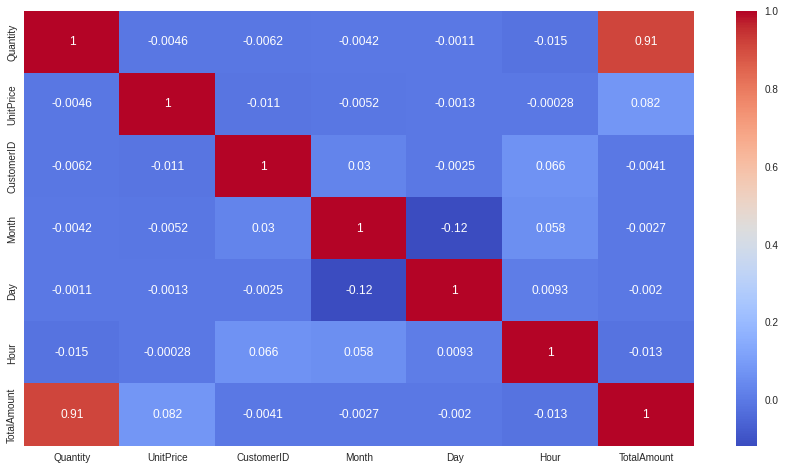

In [64]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

#### 1. Why did you pick the specific chart?
#### Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

#### 2. What is/are the insight(s) found from the chart?
#### In this dataset there are is no Multicolinearity.

#### **RFM MODEL ANALYSIS;**



#### *   RFM is a method used to analyze customer value. RFM stands for Recency, Frequency, and Monetary

#### *   RECENCY: How recently did the customer visit our website or how recently did a customer purchase


#### *   Frequency: How often do they visit or how often do they purchase

#### * Monetary: How much revenue we get from their visit or how much do they spend when they purchase



# **WHY RFM ANALYSIS?**
#### **RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.**

#### **The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.**

## **Finding RFM Scores**

In [65]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMscores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMscores['InvoiceDate'] = RFMscores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMscores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMscores.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

## Distribution Plots for Recency Frequency and Monetary

In [66]:
#Descriptive Statistics (Recency)
RFMscores.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

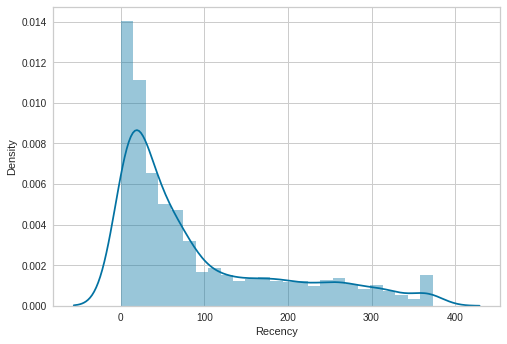

In [67]:
#Recency distribution plot
sns.distplot(RFMscores.Recency)

In [68]:
RFMscores.Frequency.describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

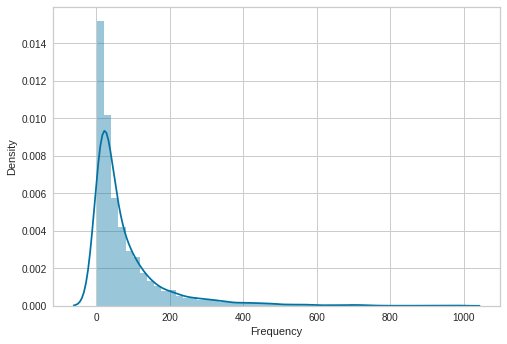

In [69]:
sns.distplot(RFMscores.query('Frequency < 1000')['Frequency'])

In [70]:
RFMscores.Monetary.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

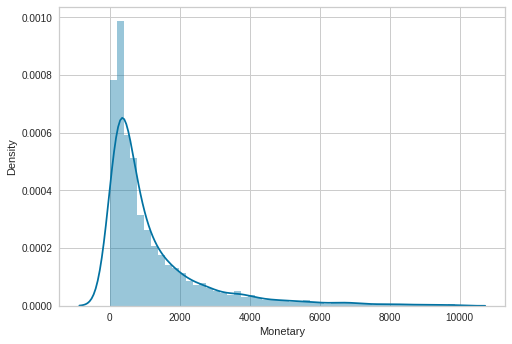

In [71]:
sns.distplot(RFMscores.query('Monetary < 10000')['Monetary'])

#### 1. Why did you pick the specific charts?
#### It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset that is why i used distplot here.

#### 2. What is/are the insight(s) found from the charts?
#### We can visualize that our Recency, Frequency, Monetary columns are positively skewed which is quite practical as the business given by a certain set of people only that is why we can see a certain decline in each of the distribution plots.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
#### From these distribution plots we can see different customer interaction and how a certain set of people only add to our business.

In [72]:
#Split the data into four segments using quantiles
qtl = RFMscores.quantile(q=[0.25,0.5,0.75])
qtl = qtl.to_dict()
qtl

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [73]:
qtl['Recency'][0.25]

17.0

In [74]:
#Converting quantiles to a dictionary, easier to use.
#quantiles = quantiles.to_dict()
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company
def RS(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4                   
                                # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
                                # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
    
def FS(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [75]:
#Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMscores['R'] = RFMscores['Recency'].apply(RS, args=('Recency',qtl,))
RFMscores['F'] = RFMscores['Frequency'].apply(FS, args=('Frequency',qtl,))
RFMscores['M'] = RFMscores['Monetary'].apply(FS, args=('Monetary',qtl,))
RFMscores.head(10)

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3
12352.0          36         85   2506.04  2  2  1
12353.0         204          4     89.00  4  4  4
12354.0         232         58   1079.40  4  2  2
12355.0         214         13    459.40  4  4  3
12356.0          22         59   2811.43  2  2  1

#### Interpretation of the segment in which the customer lies:
#### A score of 111 would be the highest achievable score, and a score of 444 the worst.

#### **Best customers** :
#### **RFM Score**: 111:

#### They are the cream customers who have bought the most recent, the most often, and generated the most revenue.

#### **Big Spenders** :
#### **RFM Score**: XX1

#### These are the customers who have generated the most revenue for your store as the montery equals 1 that is the maximum score for monetay.

#### **Loyal customers** :
#### **RFM Score**: X1X

#### They are the customers who arrive the most at the store to shop as there frequency equals 1 and the accounts the best rating.

In [76]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMscores['RFMGroup'] = RFMscores.R.map(str) + RFMscores.F.map(str) + RFMscores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMscores['RFMScore'] = RFMscores[['R', 'F', 'M']].sum(axis = 1)
RFMscores.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

### Interpretation

#### RFMScore: It is the sum of R, F and M value that assigned by quantiles.

#### RFMGroup: This is the combination of R,F, and M values.

#### For example:

#### A customer ordered a product 300 days ago, arrived on Online retail platform just once and bought 10$ dollar worth product. According to RFM table he got R = 4(Recency is very low), F = 4(Frequency is very low because he arrived just once) and M = 4(Monetary value is very low). So, the RFMGroup value become 444 means he is the worst customer, we don't need to spend more time on him.

#### Those customer are the best customers who scored R = 1, F = 1 or 2 and M = 1 or 2 means in combination it will give RFMGroup 111,112,121 values like these are good indications.

In [77]:
RFMscores.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFMGroup   4338 non-null   object 
 7   RFMScore   4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [78]:
RFMscores.describe()

Recency    Frequency       Monetary            R           F  \
count  4338.000000  4338.000000    4338.000000  4338.000000  4338.00000   
mean     92.059474    91.720609    2054.266460     2.494237     2.50876   
std     100.012264   228.785094    8989.230441     1.122059     1.12204   
min       0.000000     1.000000       3.750000     1.000000     1.00000   
25%      17.000000    17.000000     307.415000     1.000000     2.00000   
50%      50.000000    41.000000     674.485000     2.000000     3.00000   
75%     141.750000   100.000000    1661.740000     3.750000     4.00000   
max     373.000000  7847.000000  280206.020000     4.000000     4.00000   

                 M     RFMScore  
count  4338.000000  4338.000000  
mean      2.500000     7.502997  
std       1.118369     2.815045  
min       1.000000     3.000000  
25%       1.250000     5.000000  
50%       2.500000     8.000000  
75%       3.750000    10.000000  
max       4.000000    12.000000

In [79]:
RFMscores['RFMScore'].describe()

count    4338.000000
mean        7.502997
std         2.815045
min         3.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: RFMScore, dtype: float64

In [80]:
RFMscores[RFMscores['RFMScore']<=5].shape

(1263, 8)

In [146]:
RFMscores['RFMScore'].value_counts()

10    517
9     464
7     459
8     452
3     440
5     428
6     413
4     395
11    385
12    385
Name: RFMScore, dtype: int64

#### **From our RFM score only we can segment our customers from best to worst**
#### Customer having RFMscores between **3-5 are the best customers**
#### Customer having RFMscores between **5-8 are the good customers**
#### Customer having RFMscores between **8-10 are the fair customers**
#### Customer having RFMscores between **10-12 are the customers who are gone or** **are not at all good for business**

# Hypothesis Testing

In [81]:
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value

# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

In [82]:
from numpy import math 
from scipy.stats import *
import math

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a Null Hypothesis and Alternate Hypothesis.
#### The customerid 17850 has spent over a total amount of 200 dollars 
#### Null Hypothesis: N=200
#### Alternate Hypothesis: N!=200


#### 2. Perform an appropriate statistical test.

In [83]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
hypo_1=df[(df["CustomerID"]==17850.0)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 200
sample_mean = hypo_1["TotalAmount"].mean()
size = len(hypo_1)
std=(variance(hypo_1["TotalAmount"]))**0.5

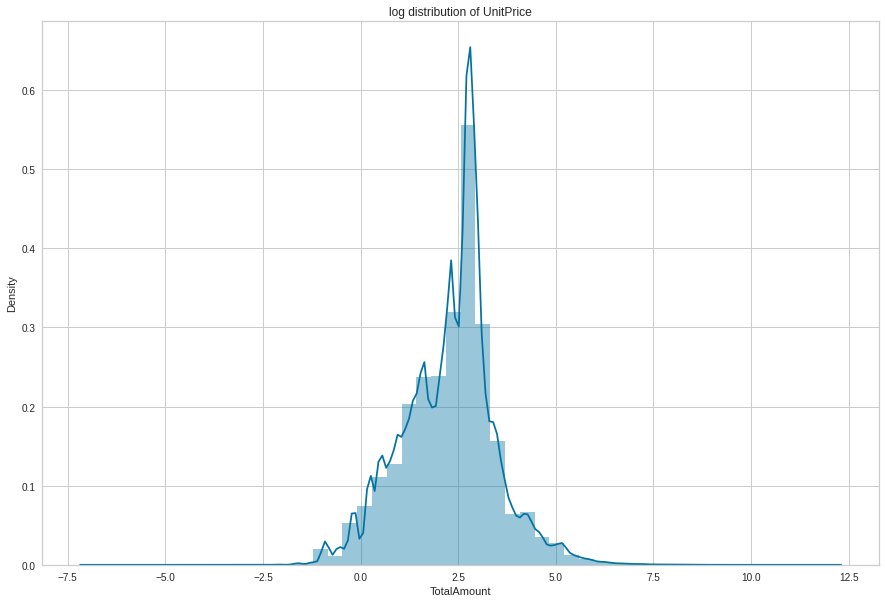

In [84]:
plt.figure(figsize=(15,10))
plt.title('log distribution of UnitPrice')
sns.distplot(np.log(df['TotalAmount']),color="B")

In [85]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="TotalAmount")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 1.0.


#### Which statistical test have you done to obtain P-Value?
#### I have used Z-Test as the statistical testing to obtain P-Value and found the result we failed to reject our null hypothesis ie our null hypothesis is true which is that Most number of customers shopping in month of november shop for atleast 20 dollars. 


#### Why did you choose the specific statistical test?

In [86]:
mean_median_difference=hypo_1["TotalAmount"].mean()- hypo_1["TotalAmount"].median()
print("Mean Median Difference is : ",mean_median_difference)

Mean Median Difference is :  2.8522222222222258


In [87]:
hypo_1["TotalAmount"].mean()

18.152222222222225

In [88]:
hypo_1["TotalAmount"].median()

15.299999999999999

#### As shown above the Mean median difference is around 2.8. Mean is greater than median but not so high. Thus, it is a  close to Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
#### Most number of customers shopping in month of november shop for atleast 20 dollars
#### Null hypothesis: N=20
#### Null hypothesis: N!=20

#### 2. Perform an appropriate statistical test.

In [89]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Month  Day  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12    1   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12    1   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   

   Hour Time_type  TotalAmount  
0     8   Morning        15.30  
1     8   Morning        20.34  
2     8   Morning        22.00  
3     8   Morning        20.34  
4     8   Morning        20.34

In [90]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
hypo_2=df[(df["Month"]==11)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 20
sample_mean = hypo_2["TotalAmount"].mean()
size = len(hypo_2)
std=(variance(hypo_2["TotalAmount"]))**0.5

In [91]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r', t="true", hypothesis_number=hypothesis_number,df=hypo_2,col="TotalAmount")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.7069218162932956e-22


#### Which statistical test have you done to obtain P-Value?
#### I have used Z-Test as the statistical testing to obtain P-Value and found the result we failed to reject our null hypothesis ie our null hypothesis is true which is that Most number of customers shopping in month of november shop for atleast 20 dollars. 

#### Why did you choose the specific statistical test?


In [92]:
mean_median_difference=hypo_2["TotalAmount"].mean()- hypo_2["TotalAmount"].median()
print("Mean Median Difference is : ",mean_median_difference)

Mean Median Difference is :  8.13401946351366


In [93]:
hypo_2["TotalAmount"].mean()

18.00401946351366

In [94]:
hypo_2["TotalAmount"].median()

9.870000000000001

#### As shown above the Mean median difference is around 8.13 and mean is greater than median which means it is positively skewed That's why I have used T-Test directly.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
#### On Thursday each customer buy for atleast 50 Dollars
#### Null hypothesis N=50
#### Alternate Hypothesis N!=50

#### 2. Perform an appropriate statistical test.

In [95]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Month  Day  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12    1   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12    1   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   

   Hour Time_type  TotalAmount  
0     8   Morning        15.30  
1     8   Morning        20.34  
2     8   Morning        22.00  
3     8   Morning        20.34  
4     8   Morning        20.34

In [96]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
hypo_3=df[(df["Day"]== 4)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 1
sample_mean = hypo_3["TotalAmount"].mean()
size = len(hypo_2)
std=(variance(hypo_3["TotalAmount"]))**0.5

In [97]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r', t="false", hypothesis_number=hypothesis_number,df=hypo_3,col="TotalAmount")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


#### Which statistical test have you done to obtain P-Value?
#### I have used T-Test as the statistical testing to obtain P-Value and found the result our null hypothesis is rejected  ie our null hypothesis is false which means that our alternate hypothesis is true which is On Thursday each customer do not buy for atleast 50 Dollars.

#### Why did you choose the specific statistical test?

In [98]:
mean_median_difference=hypo_3["TotalAmount"].mean()- hypo_3["TotalAmount"].median()
print("Mean Median Difference is : ",mean_median_difference)

Mean Median Difference is :  11.733549731182796


In [99]:
hypo_3["TotalAmount"].mean()

22.133549731182796

In [100]:
hypo_3["TotalAmount"].median()

10.4

####As shown above the Mean median difference is around 11.7 and mean is greater than median which means it is positively skewed That's why I have used T-Test directly.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values
#### We have handled the missing values earlier so we need not do it again

In [101]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
Day            0
Hour           0
Time_type      0
TotalAmount    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?
#### Since null values are present in the CustomerID and we know that every customerid is unique to different customers so we cannot input values from our own as it will add noise to our dataset so we will drop the null values for customerid column directly.
#### Description column has also some null values but for this column aswell we dont know what product the null values represent to so we will dropping the null values from this columns aswell.
#### I have encountered some duplicated observations in the dataset, when we have frequent duplicates in our database, we may inadvertently send multiple clustering messages to the same person CustomerID. As a Consequence, we dropped it.
#### Here i have also removed all the invoice no. that contains C as the C in the invoice no. stands for cancellation of product we can do another analysis who cancelled but that is not the target of our project.

### 2. Handling Outliers

In [102]:
# Handling Outliers & Outlier treatments
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMscores['Recency'] = [handle_neg_n_zero(x) for x in RFMscores.Recency]
RFMscores['Monetary'] = [handle_neg_n_zero(x) for x in RFMscores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Data = RFMscores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)


#### What all outlier treatment techniques have you used and why did you use those techniques?
#### Here i am handling negative and zero values so as to handle infinite numbers during log transformation.Appling handle negative and zero value function to Recency and Monetary columns and then performing Log transformation to bring data into normal or near normal distribution.

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
#### Here we are transforming our RFMScores dataframe because when our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data.

### Data distribution after data normalization for Recency, Frequency and Monetary

In [103]:
from sklearn import preprocessing
RFMscores['Recency_log'] = RFMscores['Recency'].apply(math.log)
RFMscores['Frequency_log'] = RFMscores['Frequency'].apply(math.log)
RFMscores['Monetary_log'] = RFMscores['Monetary'].apply(math.log)

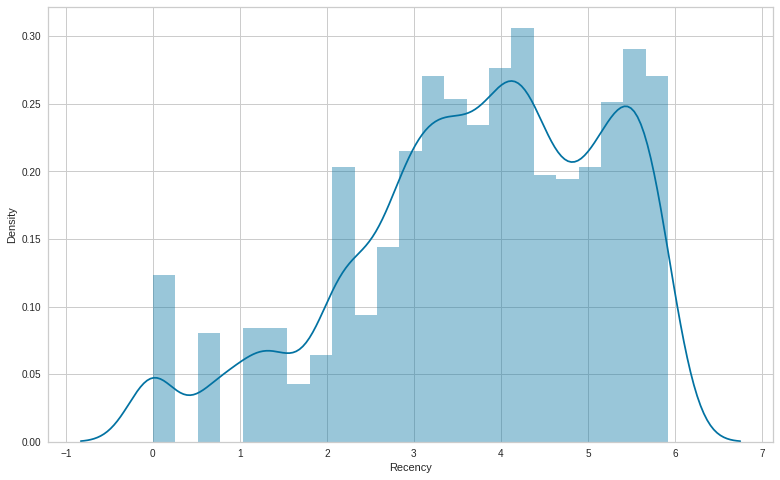

In [104]:
#Data distribution after data normalization for Recency
plt.figure(figsize=(13,8))
sns.distplot(Log_Data['Recency'])

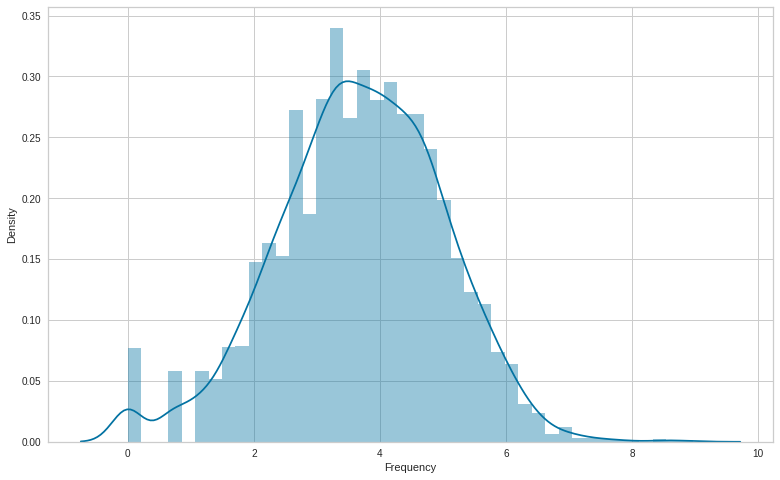

In [105]:
#Data distribution after data normalization for Frequency
plt.figure(figsize=(13,8))
sns.distplot(Log_Data.query('Frequency < 1000')['Frequency'])

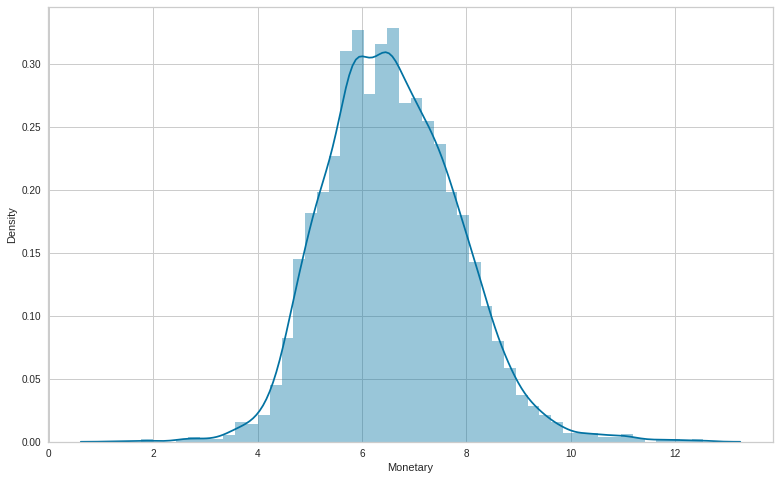

In [106]:
#Data distribution after data normalization for Monetary
plt.figure(figsize=(13,8))
sns.distplot(Log_Data.query('Monetary < 10000')['Monetary'])

#### 1. Why did you pick the specific charts?
#### Here i wanted to see the distribution of Recency, Monetary, Frequency after applying log transformation individually so i used a distribution plot.

#### 2. What is/are the insight(s) found from the chart?
#### We can visualize that the Recency, Monetary, Frequency are close to normal distribution.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [107]:
# Manipulate Features to minimize feature correlation and create new features
from datetime import datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Hour']=df['InvoiceDate'].dt.hour


In [108]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

#### 2. Feature Selection

#### What all feature selection methods have you used  and why?
#### Here i have used no feature selection as we very less number of columns.


#### Which all features you found important and why?
#### In this dataset UnitPrice and Quantity and the TotalAmount are really very important as these columns tells us about product sale status and the profit of business.

### 6. Data Scaling

In [109]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

#Bring data on same scale
scaler = StandardScaler()
Scaled_Data = scaler.fit_transform(Log_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMscores.index, columns = Log_Data.columns)


#### Which method have you used to scale you data and why?
#### I have used Standard Scaler to scale my data because it transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution.

## ***7. ML Model Implementation***

## K-Means Clustering

### Applying Silhouette Score Method on Recency and Monetary

In [147]:
# Applying Silhouette score method on Recency and Monetary
features_rec_mon = ['Recency_log','Monetary_log']
X_features_rec_mon = RFMscores[features_rec_mon].values

# Fit the model
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
sil_score_list=[]


range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_
# Check the silhouette score on clusters
  score = silhouette_score(X,preds)
  sil_score_list.append(score)
  print(' For n_clusters = {}, silhouette sore is{}'.format (n_clusters, score))

 For n_clusters = 2, silhouette sore is0.421461308316105
 For n_clusters = 3, silhouette sore is0.3432957775914936
 For n_clusters = 4, silhouette sore is0.36494104664274657
 For n_clusters = 5, silhouette sore is0.3350902580058069
 For n_clusters = 6, silhouette sore is0.34379875430035534
 For n_clusters = 7, silhouette sore is0.3444559995254806
 For n_clusters = 8, silhouette sore is0.33930638975853583
 For n_clusters = 9, silhouette sore is0.3455975064281253
 For n_clusters = 10, silhouette sore is0.3480766708478918
 For n_clusters = 11, silhouette sore is0.33787820078173764
 For n_clusters = 12, silhouette sore is0.34237253246065036
 For n_clusters = 13, silhouette sore is0.3399492218261396
 For n_clusters = 14, silhouette sore is0.33989419413042715
 For n_clusters = 15, silhouette sore is0.336018437373062


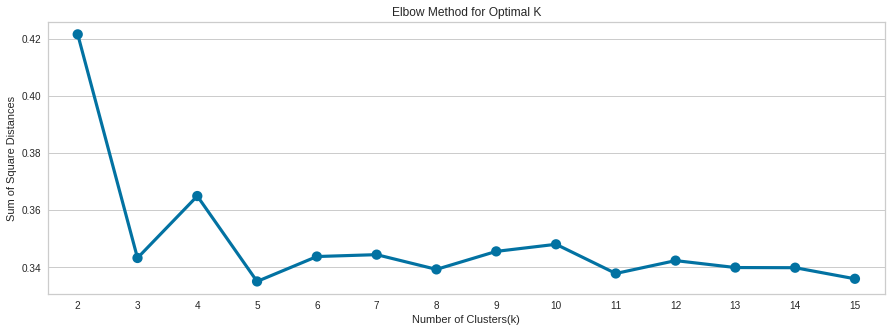

In [149]:
# Plot the graph for the sum of square distance values and number of clusters
plt.figure(figsize=(15,5))
sns.pointplot(x=range_n_clusters , y=sil_score_list )
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
#### KNN can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different.
#### Calculation of Silhouette Score

#### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.
#### The maximum Silhouette score is for 2 no. of clusters ie 0.42 and then for 4 no. of clusters ie 0.364

### Elbow Method

In [111]:
# Applying Elbow Method on Recency and Monetary
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=RFMscores[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

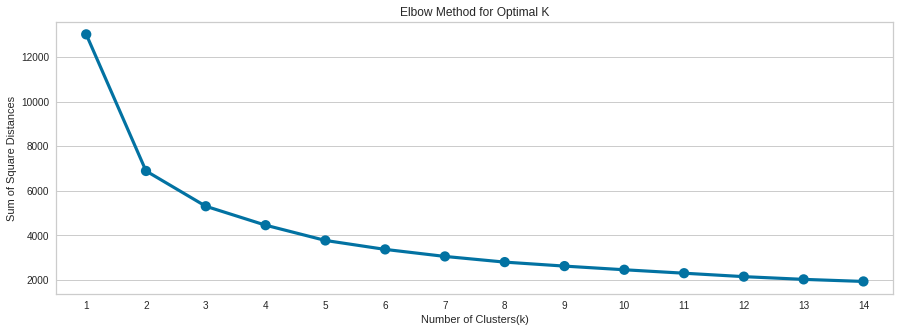

In [150]:
# Plot the graph for the sum of square distance values and number of clusters
plt.figure(figsize=(15,5))
sns.pointplot(x=list(sum_of_sq_dist.keys()), y= list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
#### Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. Let us see how this elbow method works. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.
#### When the value of k is 1, the within-cluster sum of the square will be high. As the value of k increases, the within-cluster sum of square value will decrease.
#### Finally, we will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k.

### Considering best value k=2

In [113]:
# Taking number of cluster as 2
kmeans =  KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

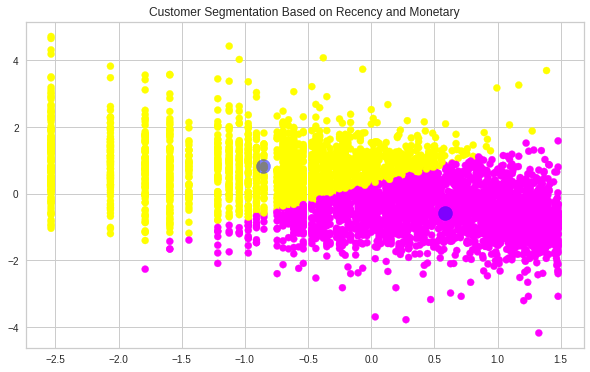

In [114]:
# Plot customer segmentation by taking k=2
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

#### We see that customers are well separated when we cluster them on the basis of Recency and Monetary

### Considering best value k=3

In [115]:
# Taking number of cluster as 3
kmeans =  KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

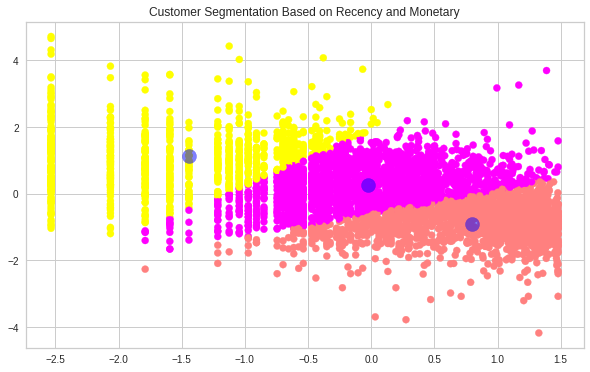

In [116]:
# Plot customer segmentation by taking k=3
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

#### For k=3 customers are well separated as a cluster 

## Implementation of Density Based Spatial Clustering of Applications with Noise (DBSCAN)

#### DBSCAN on Recency and Monetary

In [117]:
from sklearn.cluster import DBSCAN

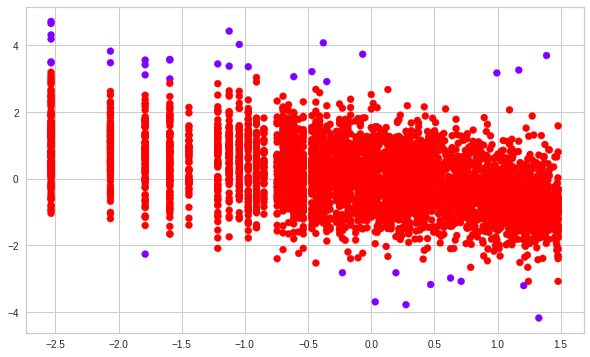

In [118]:
# Applying DBSCAN on Recency and Monetary
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='rainbow')

#### 1. Explain the ML Model?.
#### DBSCAN chooses its clusters based on the distance between nearest points,Here we can see that It has considered whole data as single cluster.DBSCAN is giving us values k=3.
#### It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

#### DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

#### In higher dimensions the circle becomes hypersphere, epsilon becomes the radius of that hypersphere, and minPoints is the minimum number of data points required inside that hypersphere.

### Applying Silhouette Score Method on Frequency and Monetary

In [119]:
# Applying silhouette score method on Frequency and Monetary
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=RFMscores[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.478535709506603
For n_clusters = 3, silhouette score is 0.40764120562174455
For n_clusters = 4, silhouette score is 0.37205487483957167
For n_clusters = 5, silhouette score is 0.34264220687249985
For n_clusters = 6, silhouette score is 0.3592907294207788
For n_clusters = 7, silhouette score is 0.3392262034279217
For n_clusters = 8, silhouette score is 0.3454782913193487
For n_clusters = 9, silhouette score is 0.3462679940979946
For n_clusters = 10, silhouette score is 0.3597943532356628
For n_clusters = 11, silhouette score is 0.3690035567121951
For n_clusters = 12, silhouette score is 0.3552076192856588
For n_clusters = 13, silhouette score is 0.36210263017604005
For n_clusters = 14, silhouette score is 0.35255016941029127
For n_clusters = 15, silhouette score is 0.35428515742717803


In [120]:
# Applying elbow method on Frequency and Monetary
sum_of_sq_dist = {}
for k in range (1,15):
  km = KMeans(n_clusters= k, init = 'k-means++', max_iter= 1000)
  km = km.fit(X)
  sum_of_sq_dist[k] = km.inertia_

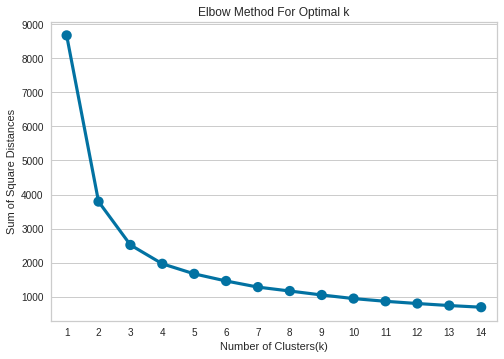

In [121]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [122]:
# Taking the number of clusters as 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

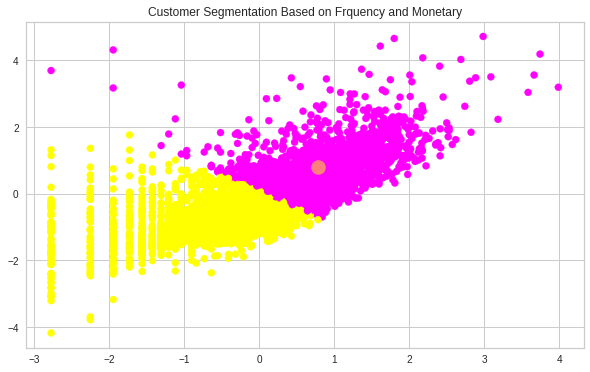

In [123]:
# Plot customer segmentation based on Frequency and Monetary
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Frquency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

#### Customers are well segmented when k=2 for Frequency and Monetary

In [124]:
# Taking the number of clusters as 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

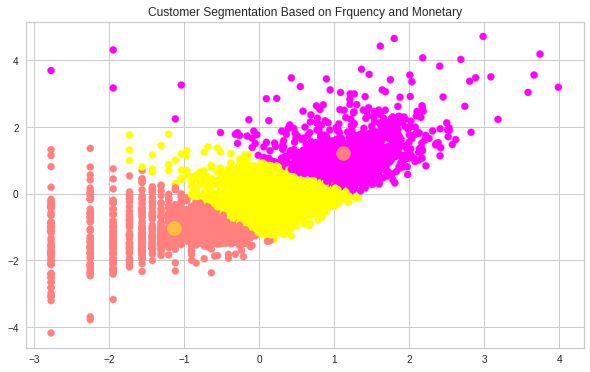

In [125]:
# Plot customer segmentation based on Fequency and Monetary
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Frquency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

#### Customers are well segmented when k=3 for Frequency and Monetary.

## DBSCAN on Frequency and Monetary

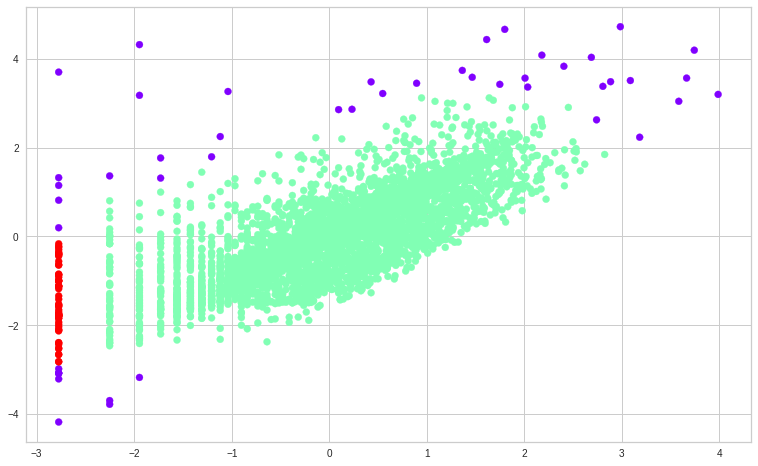

In [126]:
# Applying DBSCAN method on Frequency and Monetary
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='rainbow')

#### DBSCAN chooses its clusters based on the distance between nearest points,Here we can see that It has considered whole data into 3 clusters.DBSCAN is giving us values k=3.


## Applying Silhouette Method on Recency, Frequency and Monetary

In [127]:
# Apply silhouette on RFM
feature_vector = ['Recency_log', 'Frequency_log', 'Monetary_log']
X_features = RFMscores[feature_vector].values
scaler = preprocessing.StandardScaler()
X= scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.3956478042246982
For n_clusters = 3 The average silhouette_score is : 0.3049826724447913
For n_clusters = 4 The average silhouette_score is : 0.30279724233096916
For n_clusters = 5 The average silhouette_score is : 0.2785519277480847
For n_clusters = 6 The average silhouette_score is : 0.2789560652501828
For n_clusters = 7 The average silhouette_score is : 0.2613208163968789
For n_clusters = 8 The average silhouette_score is : 0.2640918249728342
For n_clusters = 9 The average silhouette_score is : 0.2585642595481418
For n_clusters = 10 The average silhouette_score is : 0.2644733794304285
For n_clusters = 11 The average silhouette_score is : 0.2592423011915937
For n_clusters = 12 The average silhouette_score is : 0.26503813251658404
For n_clusters = 13 The average silhouette_score is : 0.2621555416679574
For n_clusters = 14 The average silhouette_score is : 0.26140947155997746
For n_clusters = 15 The average silhouette_score is : 0.

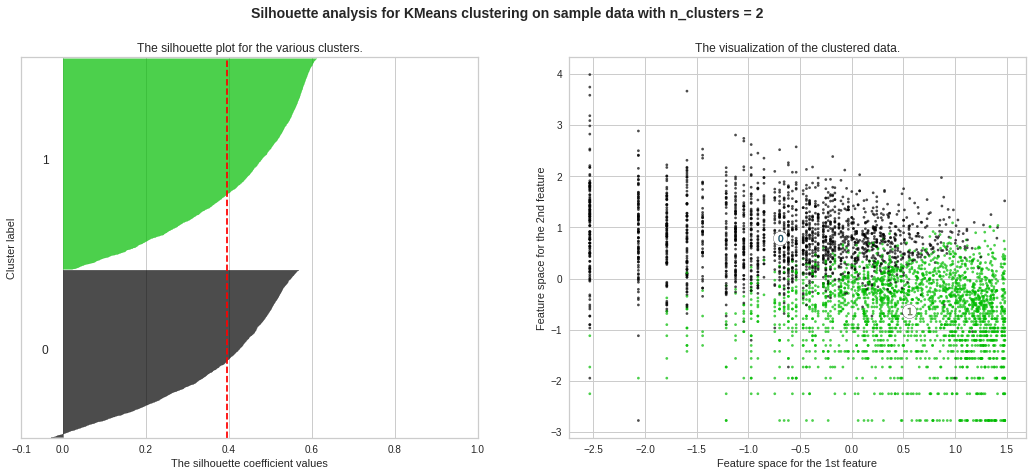

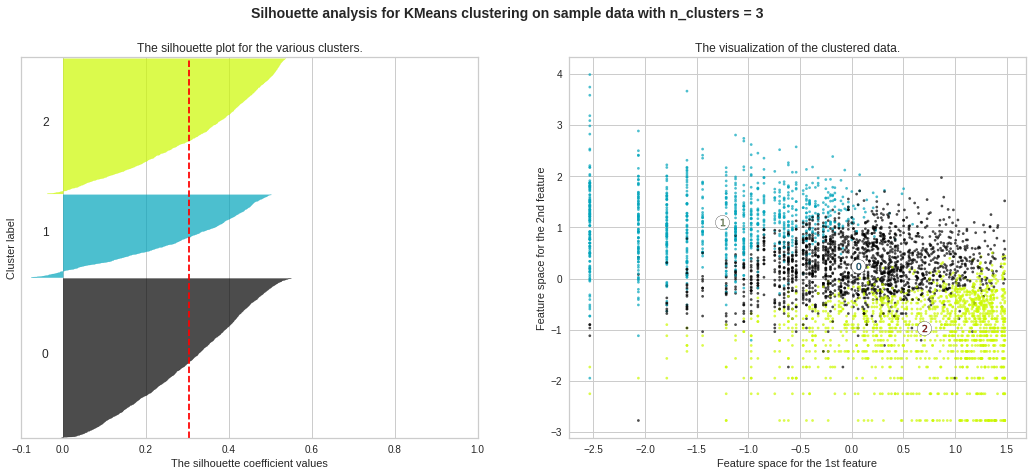

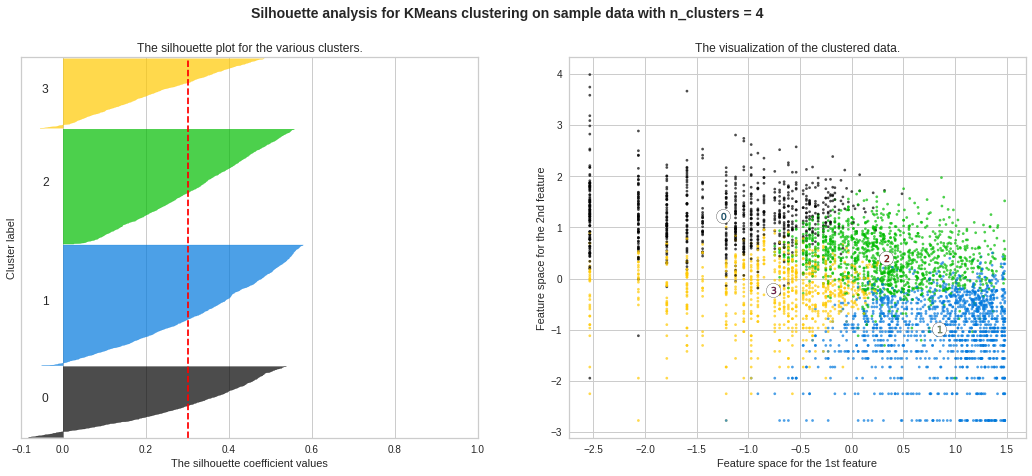

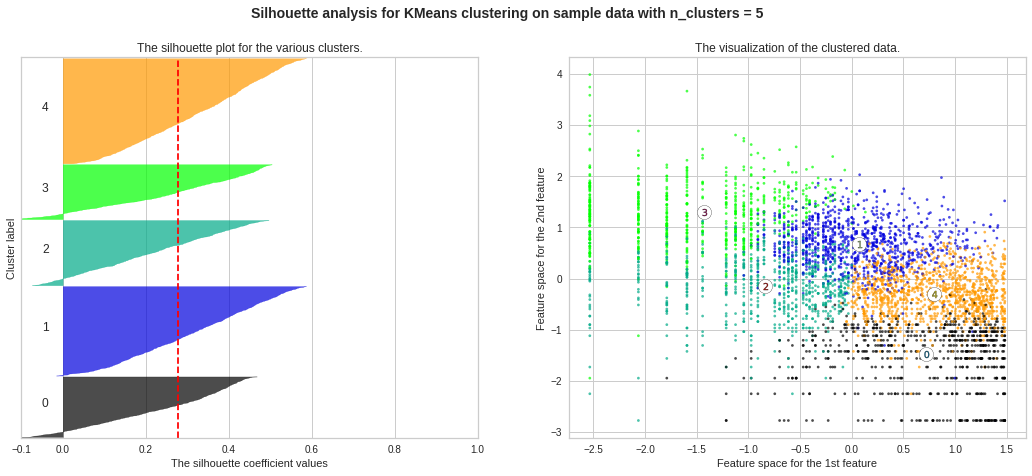

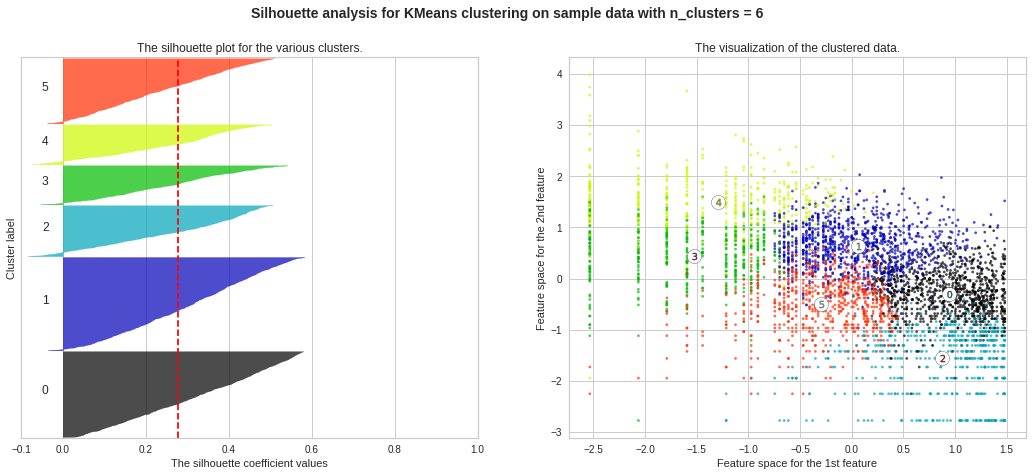

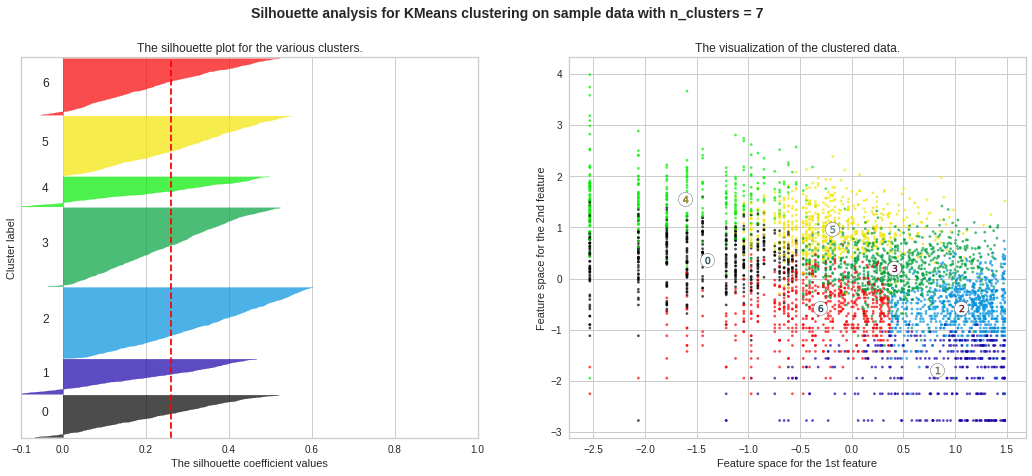

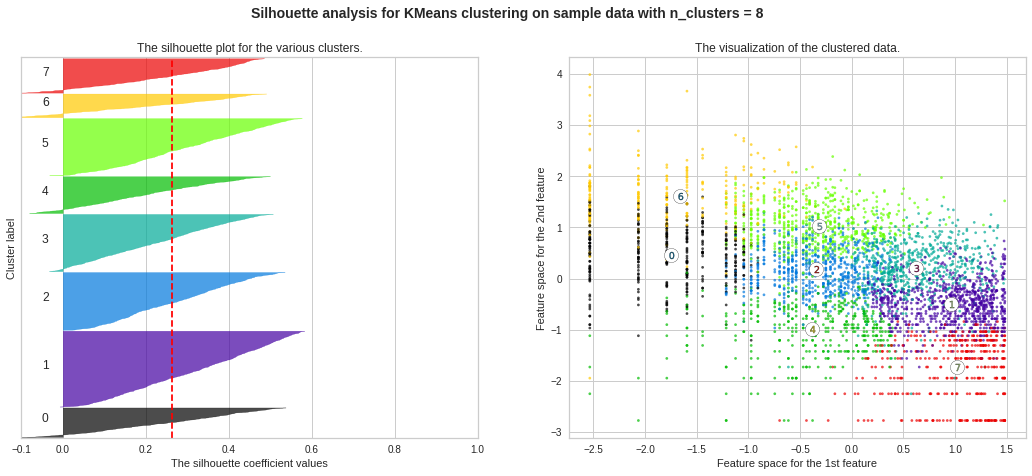

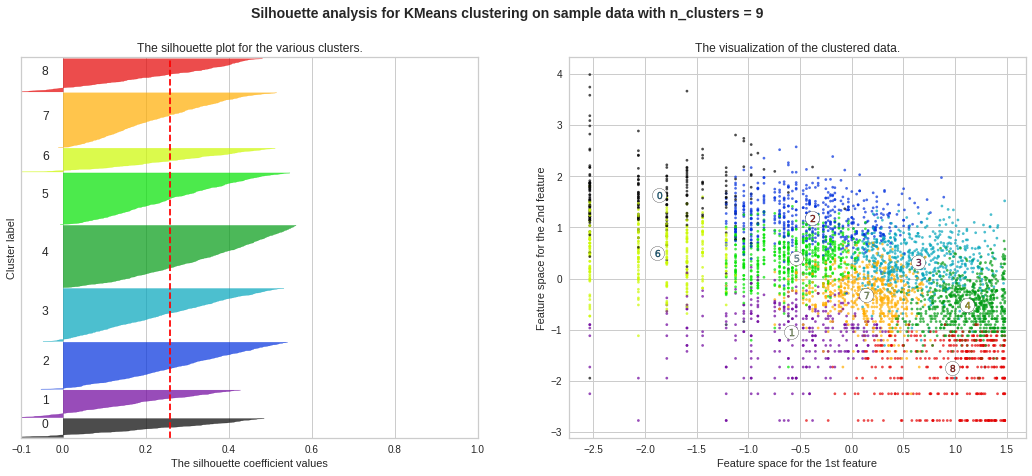

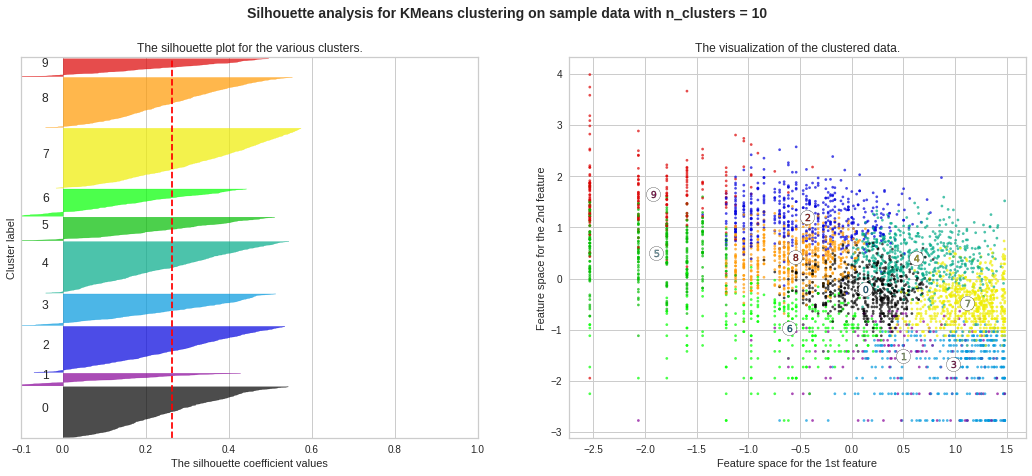

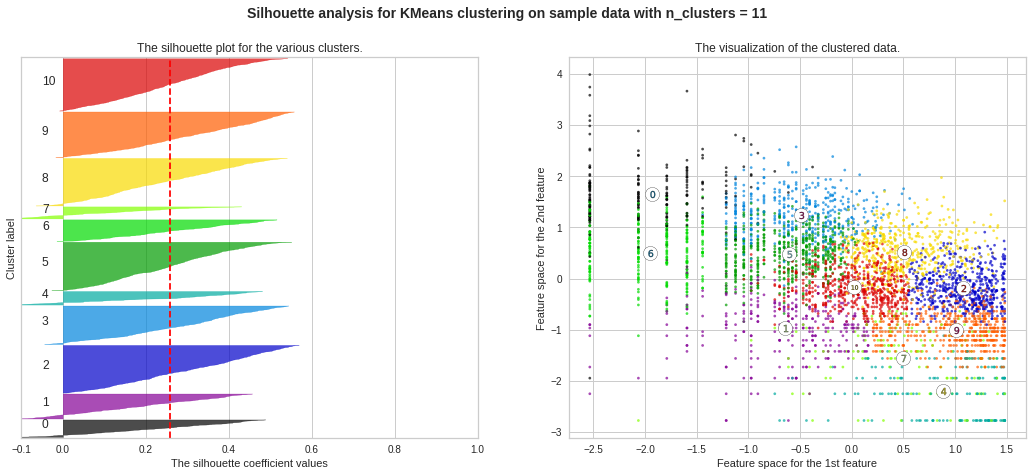

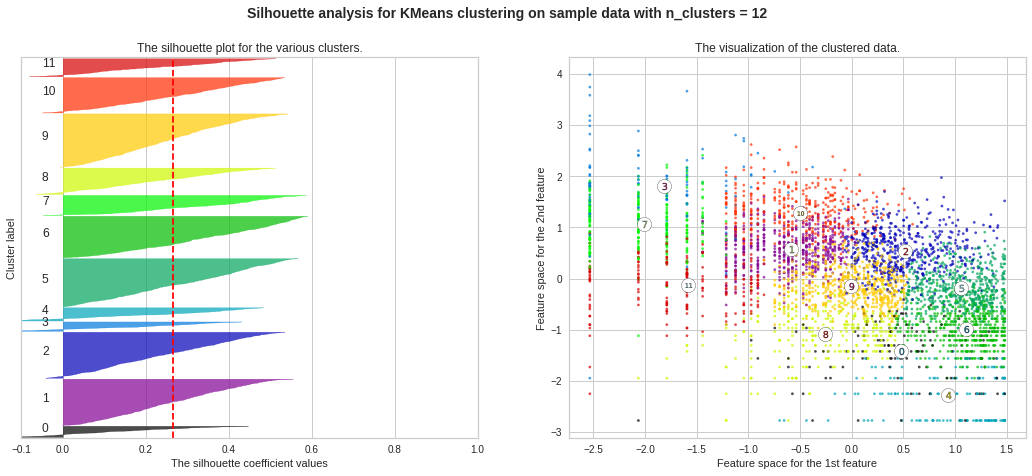

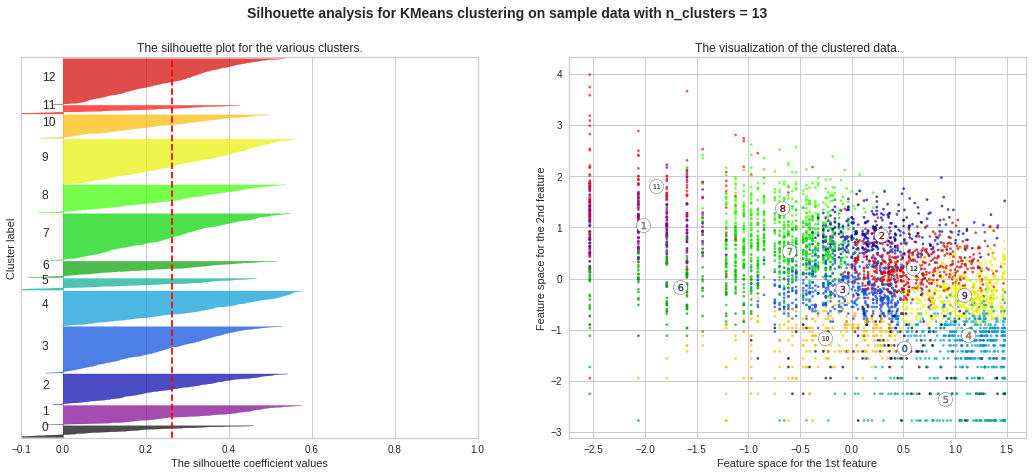

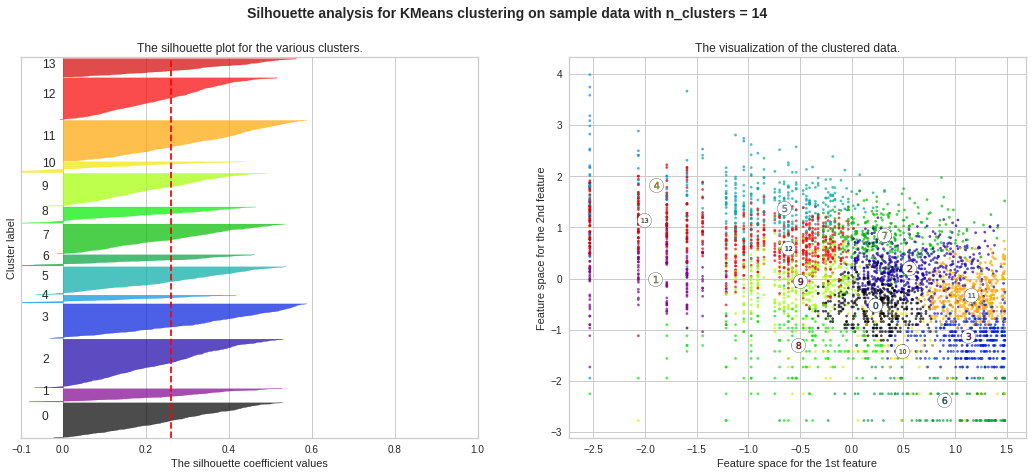

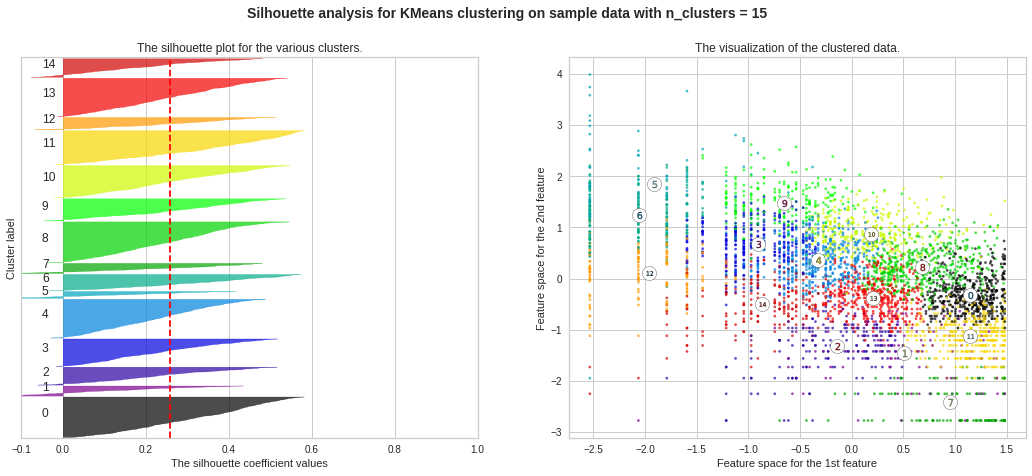

In [128]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Customer Segmentation on basis of Recency, Monetary and Frequency

In [129]:
# Customer segmentation by taking k =2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

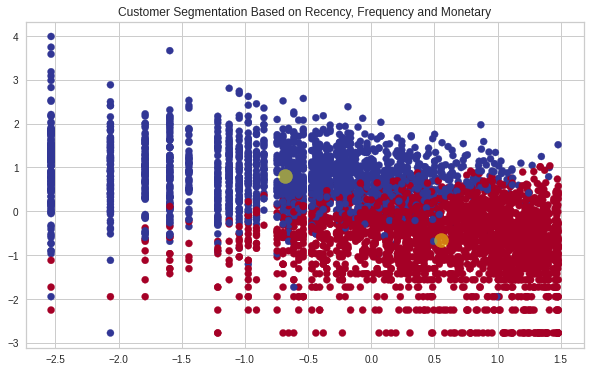

In [130]:
# Plot segmentation
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c= y_kmeans, s=50, cmap = 'RdYlBu')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'yellow', s=200, alpha=0.5)

## Elbow Method

In [131]:
# Apply elbow method on Recency, Frequency and Monetary
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
# Plot the graph for the sum of s

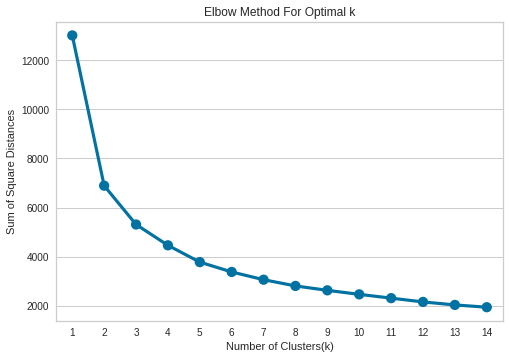

In [132]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [133]:
# Build clustering model
KMean_clust = KMeans(n_clusters = 2, init = 'k-means++', max_iter=1000)
KMean_clust.fit(X)

KMeans(max_iter=1000, n_clusters=2)

In [134]:
# Find the clusters for the observation given in the dataset
RFMscores['Cluster'] = KMean_clust.labels_
RFMscores.head(15)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   
12357.0          33        131   6207.67  2  1  1      211         4   
12358.0           1         19   1168.06  1  3  2      132         6   
12359.0          57        248   6372.58  3  1  1      311         5   
12360.0          52        129   2662.06  3  1  1      311         5   
12361.0         287         10    189.90  4  4  4      444        12   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        0  
12347.0        0.693147       5.204007      8.368693        1  
12348.0        4.317488       3.433987      7.494007        0  
12349.0        2.890372       4.290459      7.471676        1  
12350.0        5.736572       2.833213      5.812338        0  
12352.0        3.583519       4.442651      7.826459        1  
12353.0        5.318120       1.386294      4.488636        0  
12354.0        5.446737       4.060443      6.984161        0  
12355.0        5.365976       2.564949      6.129921        0  
12356.0        3.091042       4.077537      7.941449        1  
12357.0        3.496508       4.875197      8.733541        1  
12358.0        0.000000       2.944439      7.063100        1  
12359.0        4.043051       5.513429      8.759760        1  
12360.0        3.951244       4.859812      7.886856        1  
12361.0        5.659482       2.302585      5.246498        0

In [135]:
RFMscores.groupby('Cluster').mean()

Recency   Frequency     Monetary         R         F         M  \
Cluster                                                                      
0        140.637340   25.000826   472.325866  3.109872  3.268484  3.247831   
1         30.728221  175.981742  4052.116318  1.716745  1.549296  1.555556   

         RFMScore  Recency_log  Frequency_log  Monetary_log  
Cluster                                                      
0        9.626188     4.549054       2.834836      5.784875  
1        4.821596     2.711749       4.746801      7.608572

## Dendogram

In [136]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from prettytable import PrettyTable

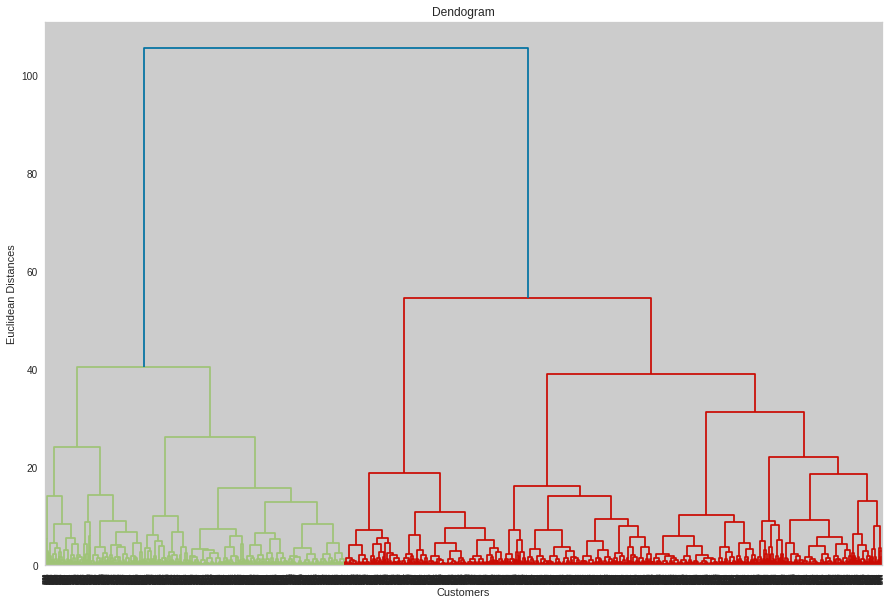

In [137]:
# plot the optimal number of cluster using Dendogram
# Find the largest vertical ditance we can make without crossing any other horizontal line
plt.figure(figsize=(15,10))
dendogram = sch.dendrogram(sch.linkage(X,method= 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

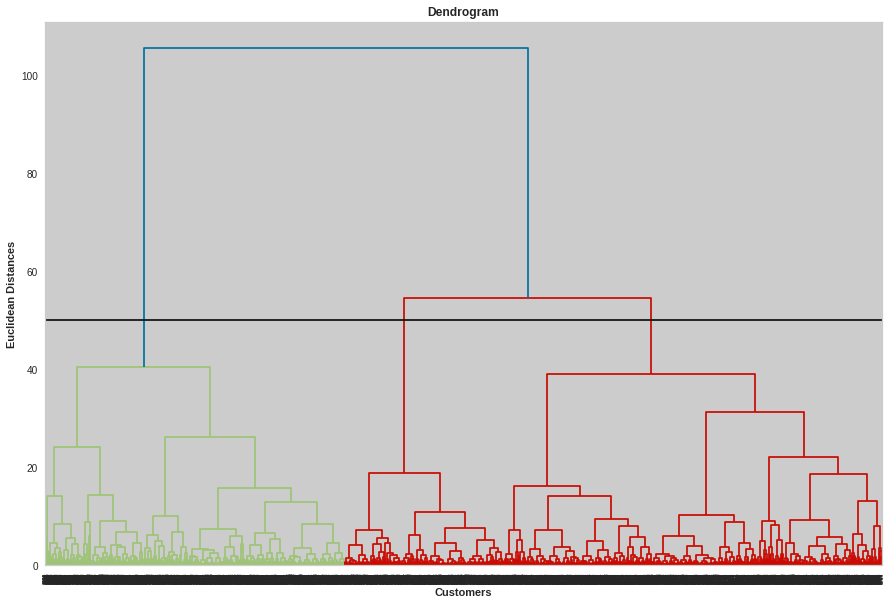

In [138]:
#Dendogram plot: for best cluster number:

plt.figure(figsize=(15,10))

# max_d = cut-off/ Threshold value
max_d = 50

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontweight = 'bold')
plt.xlabel('Customers',fontweight = 'bold')
plt.ylabel('Euclidean Distances',fontweight = 'bold')
#Cutting it on threshold value
plt.axhline(y = max_d,c = 'k')
plt.show()

#### 1. Explain the ML Model and its performace?
#### A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters. We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line. Find largest vertical distance we can make without crossing any other horizontal line).

#### This technique is specific to the agglomerative hierarchical method of clustering. The agglomerative hierarchical method of clustering starts by considering each point as a separate cluster and starts joining points to clusters in a hierarchical fashion based on their distances.

#### To get the optimal number of clusters for hierarchical clustering, we make use a dendrogram which is tree-like chart that shows the sequences of merges or splits of clusters. If two clusters are merged, the dendrogram will join them in a graph and the height of the join will be the distance between those clusters.

### Agglomerative Clustering

In [139]:
# Fitting the hierarchial clustering to the dataset
h_cluster = AgglomerativeClustering(n_clusters= 2, affinity= 'euclidean', linkage = 'ward')
y_h_cluster = h_cluster.fit_predict(X)

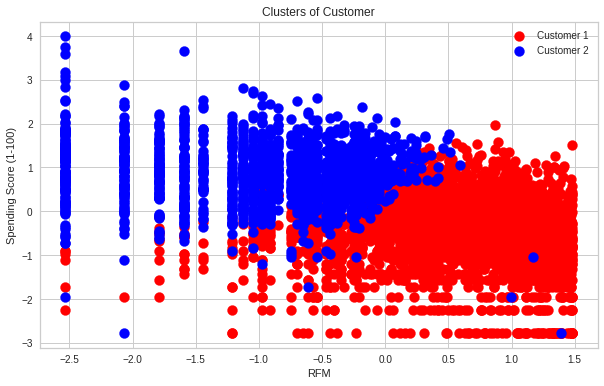

In [140]:
# Visualizing clusters (2D only)
plt.figure(figsize=(10,6))
plt.scatter(X[y_h_cluster == 0, 0], X[y_h_cluster == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_h_cluster == 1, 0], X[y_h_cluster == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### 1. Explain the ML Model and its performace?
#### The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram.

### Implementing DBSCAN to Recency, Frequency and Monetary

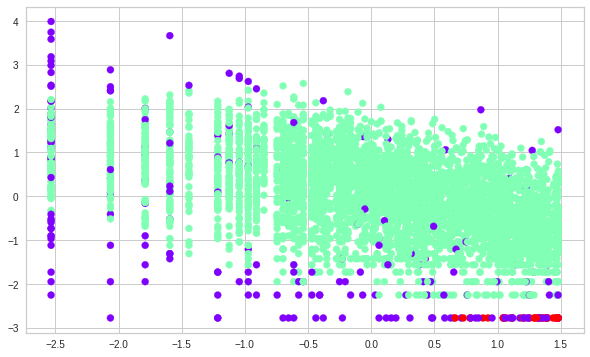

In [141]:
# Applying DBSCAN on RFM
y_pred = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:,1], c=y_pred,cmap='rainbow')

#### DBSCAN is able to segment our customers into three clusters.

In [145]:
# Create a table and specify the column while initializing the table
summary_table = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])
# Add Rows
summary_table.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
summary_table.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
summary_table.add_row(['3',"DBSCAN ", "RM", "3"]) 
summary_table.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
summary_table.add_row(['5',"K-Means with Elbow method  ", "FM", "2"])
summary_table.add_row(['6',"DBSCAN ", "FM", "3"])
summary_table.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
summary_table.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
summary_table.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
summary_table.add_row(['9',"Hierarchical clustering after cutoff  ", "RFM", "3"])
summary_table.add_row(['10',"DBSCAN ", "RFM", "3"])
print(summary_table)

+--------+----------------------------------------+------+---------------------------+
| SL No. |               Model_Name               | Data | Optimal_Number_of_cluster |
+--------+----------------------------------------+------+---------------------------+
|   1    |     K-Means with silhouette_score      |  RM  |             2             |
|   2    |      K-Means with Elbow methos         |  RM  |             2             |
|   3    |                DBSCAN                  |  RM  |             3             |
|   4    |     K-Means with silhouette_score      |  FM  |             2             |
|   5    |      K-Means with Elbow method         |  FM  |             2             |
|   6    |                DBSCAN                  |  FM  |             3             |
|   7    |     K-Means with silhouette_score      | RFM  |             2             |
|   8    |      K-Means with Elbow methos         | RFM  |             2             |
|   9    |       Hierarchical clustering   

### 1. Which Evaluation metrics did you consider for a positive business impact and why?
### I will consider Silhouette score for positive business impact as it gives us the score as well as we can visulalize how the clusters are being formed for different silhouette score.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?
### I will use K-mean model as it allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [143]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [144]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

#### Following are the conclusion made during EDA:

#### 1. Top Five Countries: Uniter Kingdom, Germany, France, Ireland and Spain.

#### 2. Month which give maximum business: November, October, December, September and May.

#### 3. Maximum purchasing on different days: Thursday > Wednesday > Tuesday > Monday > Saturday > Friday.

#### 4. Most of the customers usually purchase products in between 10:00 A.M to 3:00 P.M.

#### 5. The company should make sure that the website server is up and running during that hrs, and also invest on cx support during that hrs.

#### 6. WHITE HANGING HEART T-LIGHT HOLDER > REGENCY CAKESTAND 3 TIER> JUMBO BAG RED RETROSPOT were ordered with top 3 highest frequency.
#### The company is suggested to keep the inventory always stocked with these products.

#### 7. GLASS AND BEADS BRACELET IVORY , CROCHET LILAC/RED BEAR KEYRING , PINK BAROQUE FLOCK CANDLE HOLDER were ordered in the lo9west number.

#### 8. A number of cx also cancelled the order. The company should ideally look into it.

#### 9. Given Data for Customer Segmentation most of them are irrelevant like StockCode, Description.etc and there is no relation.

#### 10. After Applying Elbow and Silhouette score are more at cluster size =3 or 2

#### 11. Same results applied with Dendrogram results of Kmeans Clusters Centers in plots appears better than Hierarchical Agglomerative Clustering

#### **Cluster_0 CustomerID's take more time gap between Each Order they Placed (Rarely).**

#### **Cluster_1 CustomerID's Makes always a Bulk Purchases which leads high Spending's (Retailers).**

#### **Cluster_2 CustomerID's Has Highest Orders Placed (Small Shops with less inventory).**

#### 12. To conclude, we saw how we can segment our customer depending on our business requirements. You can perform RFM for your entire customer base, or just a subset. For example, you may first segment customers based on a geographical area or other demographics, and then by RFM for historical, transaction-based behaviour segments. RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest. We used the K-means algorithm to segment our customer in various clusters having similar similarity. I think K-means did a pretty good job here.

#### **How is your project useful to stakeholders.**

##### The project help the company to improve their business by undestanding the income , highest selling product , based on the country where the customer residing . so considering these factors company can sell more product depenting on their needs , and region where most of the wholesailers residing etc .

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***